### 1.1) Mount google drive to colab

In [2]:
# mount google drive to colab
from google.colab import drive
import os
n = 140
drive.mount('/content/drive')
print("#" * n)

# change working directory
print("### colabs default working directory")

print("###\n### path: {}".format(os.getcwd()))
print("#" * n)
print("### setted working directory")

%cd drive/Shareddrives/MADS_Milestone1/

print("###\n### {}".format(os.getcwd()))
print("#" * n)



Mounted at /content/drive
############################################################################################################################################
### colabs default working directory
###
### path: /content
############################################################################################################################################
### setted working directory
/content/drive/Shareddrives/MADS_Milestone1
###
### /content/drive/Shareddrives/MADS_Milestone1
############################################################################################################################################


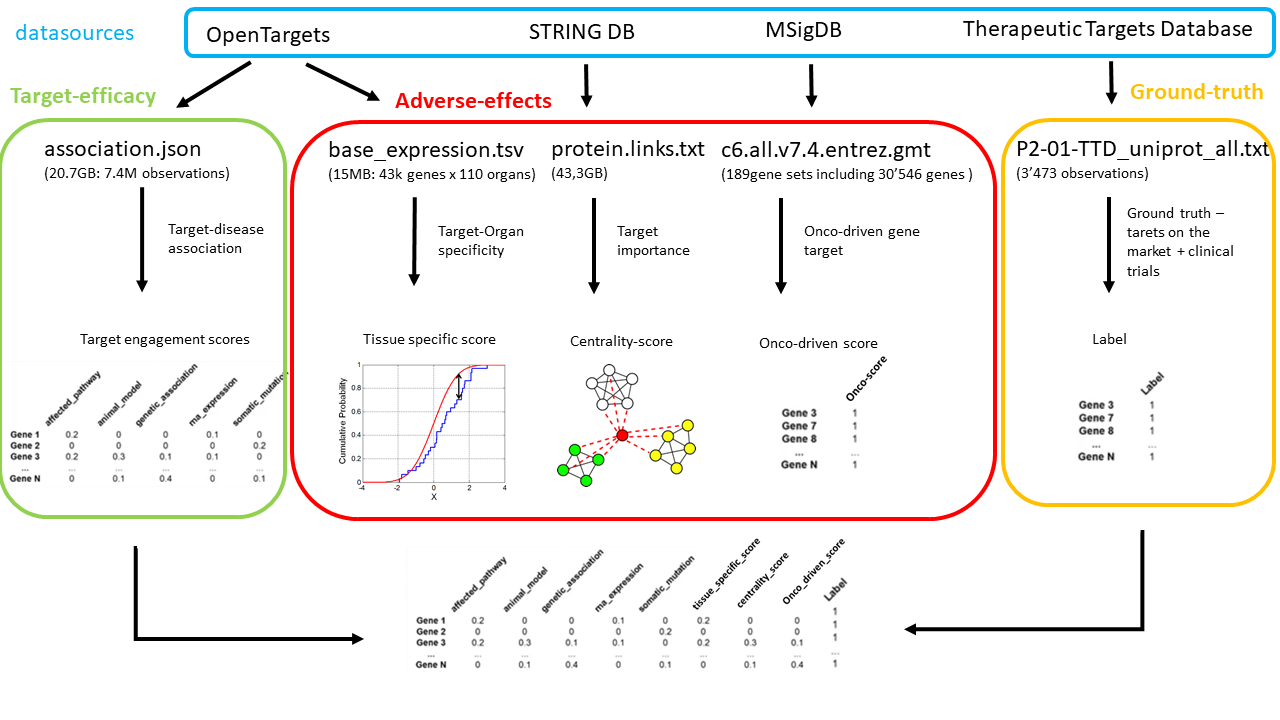

In [ ]:
from IPython.display import Image
Image('Visualizations/data_integration.png', width=900, height=500)


### 1.2) Import libraries

In [3]:
import pandas as pd
import numpy as np
import subprocess
import re
import os
import seaborn as sns

### 1.3) Fetch all files from the 'Intermediate_Assets' directory to merge

In [4]:
# define the ls command to find all results
ls = subprocess.Popen(["ls", "-p", "./Intermediate_Assets"],
                      stdout=subprocess.PIPE,
                     )

# define the grep command to exclude all folders
grep = subprocess.Popen(["grep", "-v", "/$"],
                        stdin=ls.stdout,
                        stdout=subprocess.PIPE,
                        )

# read from the end of the pipe (stdout)
endOfPipe = grep.stdout


csv = {}

path = "Intermediate_Assets/"
# output the files line by line
for line in endOfPipe:  
    
    w = re.sub( "\\\\n'$", "", str(line))
    w = re.sub("^b'", "", w)
    front = re.sub("\d+.", "", w)
    name = re.sub("\..*", "", front)

    if ".csv" in w:
        csv[name] = path + w

#csv.pop("Onco_genes") 
#csv.pop("Baseline")  
csv

{'Baseline': 'Intermediate_Assets/03_Baseline.csv',
 'Onco_genes': 'Intermediate_Assets/04_Onco_genes.csv',
 'degree_centrality_score': 'Intermediate_Assets/02_degree_centrality_score.csv',
 'ground_truth': 'Intermediate_Assets/05_ground_truth.csv',
 'target_association': 'Intermediate_Assets/01_target_association.csv'}

### 1.4) Import all intermediate files

In [5]:
for k,v in csv.items():
  globals()[k] = pd.read_csv(v)


check some basic properties of these datasets such as path, dimensionality, some stats, datatypes and number of missing values. 

In [6]:
n = 80
for k,v in csv.items():  
  print("#"*n)
  print("### directory of '{}' dataset:\n### {}".format(k, os.getcwd() + "/" + v))
  print("#"*n)
  print("### Dimensioality of '{}' dataset:\n### {}".format(k, globals()[k].shape))
  print("#"*n)
  print("### Distribution of '{}' dataset:\n{}".format(k, globals()[k].describe()))
  print("#"*n)
  print("### Dtypes of '{}' dataset:\n### {}".format(k, globals()[k].dtypes))
  print("#"*n)
  print("### Number of missing values of '{}' dataset:\n### {}".format(k, globals()[k].isnull().apply(np.sum)))
  display(globals()[k].head())

################################################################################
### directory of 'target_association' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/01_target_association.csv
################################################################################
### Dimensioality of 'target_association' dataset:
### (27472, 11)
################################################################################
### Distribution of 'target_association' dataset:
       overall_score  ...  druggability_score_antibody
count   27472.000000  ...                 27472.000000
mean        0.139367  ...                     0.158504
std         0.126350  ...                     0.227092
min         0.000611  ...                     0.000000
25%         0.042172  ...                     0.000000
50%         0.107988  ...                     0.000000
75%         0.198423  ...                     0.350000
max         1.000000  ...                     1.000000

[8 

SYMBOL  ...  druggability_score_antibody
0      NF1  ...                     0.000000
1    ABCC6  ...                     0.450000
2     AKT2  ...                     0.525000
3    NSDHL  ...                     0.350000
4  RNASET2  ...                     0.566667

[5 rows x 11 columns]

################################################################################
### directory of 'degree_centrality_score' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/02_degree_centrality_score.csv
################################################################################
### Dimensioality of 'degree_centrality_score' dataset:
### (19354, 2)
################################################################################
### Distribution of 'degree_centrality_score' dataset:
       degree_centrality_score
count             19354.000000
mean                  0.031396
std                   0.027328
min                   0.000052
25%                   0.012453
50%                   0.024234
75%                   0.042061
max                   0.395029
################################################################################
### Dtypes of 'degree_centrality_score' dataset:
### SYMBOL                      object
degree_centrality_score    float

SYMBOL  degree_centrality_score
0     ARF5                 0.085878
1    CALM2                 0.097143
2  ARHGEF9                 0.035912
3     ERN1                 0.080659
4   CDKN2A                 0.203534

################################################################################
### directory of 'Baseline' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/03_Baseline.csv
################################################################################
### Dimensioality of 'Baseline' dataset:
### (30517, 2)
################################################################################
### Distribution of 'Baseline' dataset:
       tissue_specificity_score
count              30517.000000
mean                   0.497867
std                    0.328028
min                    0.000000
25%                    0.147729
50%                    0.573697
75%                    0.829099
max                    0.915395
################################################################################
### Dtypes of 'Baseline' dataset:
### SYMBOL                       object
tissue_specificity_score    float64
dtype: object
###############################################

SYMBOL  tissue_specificity_score
0       7SK                  0.553783
1      A1BG                  0.685998
2  A1BG-AS1                  0.048413
3      A1CF                  0.242063
4       A2M                  0.731847

################################################################################
### directory of 'Onco_genes' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/04_Onco_genes.csv
################################################################################
### Dimensioality of 'Onco_genes' dataset:
### (7477, 2)
################################################################################
### Distribution of 'Onco_genes' dataset:
       onco_driven_score
count             7477.0
mean                 1.0
std                  0.0
min                  1.0
25%                  1.0
50%                  1.0
75%                  1.0
max                  1.0
################################################################################
### Dtypes of 'Onco_genes' dataset:
### SYMBOL               object
onco_driven_score     int64
dtype: object
################################################################################
### Number of missing values of 'Onc

SYMBOL  onco_driven_score
0   NOL10                  1
1  CELSR1                  1
2    RHOH                  1
3    DGKD                  1
4  ITPRIP                  1

################################################################################
### directory of 'ground_truth' dataset:
### /content/drive/Shareddrives/MADS_Milestone1/Intermediate_Assets/05_ground_truth.csv
################################################################################
### Dimensioality of 'ground_truth' dataset:
### (3473, 2)
################################################################################
### Distribution of 'ground_truth' dataset:
       SYMBOL         TARGTYPE
count    3473             3473
unique   2854                5
top      BACT  Research target
freq       91             1778
################################################################################
### Dtypes of 'ground_truth' dataset:
### SYMBOL      object
TARGTYPE    object
dtype: object
################################################################################
### Number of missing values of 'ground_truth' dataset:
### SYMBOL      0
TARGTYPE    0
dtype: int64


SYMBOL               TARGTYPE
0   SPP1        Research target
1   TGFA  Clinical Trial target
2   FUNG        Research target
3   CCN2  Clinical Trial target
4  MRCKA        Research target

So, we have two smaller datasets (onco_driven_scores and ground truth dataset) compared to the rest. Our strategy here is to assign each gene that does not exist in the onco gene score dataset with a 0 (meaning that these are not onco-driven genes). Therefore, we are going to perform a LEFT JOIN with the other dataset. 

The ground truth is also very small - since we have only a few successful cases that are known. We are also going to perform a LEFT JOIN here because we do not want to lose the other non-target genes which are associated with safety and efficacy scores. These will actually serve as non-target (negative) labels that we are using for our models

All other datasets are integrated using an INNER JOIN.



In [7]:
CSV = sorted(csv.items(), key=lambda x: x[1])
n = 80
JOIN = "SYMBOL"
for k,v in CSV:
  if "01" in v:  
    df = globals()[k]
    df.drop(columns="overall_score", inplace=True) # redudant therefore need to drop
    df.drop(columns="literature_score", inplace=True) # could be used to validate results therefore might be dorped
    df.drop(columns=["druggability_score_antibody","druggability_score_other_modalities", "druggability_score_smallmolecule"],inplace=True) # because its leaking informations about our ground truth labels
    
    
    print("#"*n)
    print("### '{}' dataset was assigned to 'df' as first merging dataset\n### Dimensionality: {}".format(k, df.shape))

  else:
    if "05" in v:
            
      df2 = df.copy().shape
      df = df.merge(globals()[k] , how="left", on=JOIN)

      print("#"*n)
      print("### '{}' dataset was merged to df using 'LEFT JOIN on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### number of genes that are not matched in the dataset {} corresponding to {} matched gene targets".format(df.shape[0]-df2[0], globals()[k].shape[0] - (df.shape[0]-df2[0])))
    elif "04" in v:
      
      
      df = df.merge(globals()[k] , how="left", on=JOIN)
      df.loc[:,globals()[k].columns[-1]].fillna(0, inplace=True)
      catched = df.loc[:,globals()[k].columns[-1]].value_counts()
         
      print("#"*n)
      print("### '{}' dataset was merged to df using 'LEFT JOIN on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### number of genes that are not matched in the dataset {} corresponding to {} matched gene targets".format(len(globals()[k])-catched[1], catched[1]))
    
    else:
      
      df2 = df.merge(globals()[k] , how="outer", on=JOIN)
      df = df.merge(globals()[k] , how="inner", on=JOIN)
      print("#"*n)
      print("### '{}' dataset was merged to df using 'inner JOIN' on '{}'\n### New dimensionality of dataset {}".format(k, JOIN, df.shape))
      print("### genes that were filtered out {} due to 'INNER JOIN'".format(df2.shape[0]-df.shape[0]))
  display(df.head())

df.set_index(JOIN, inplace=True)

################################################################################
### 'target_association' dataset was assigned to 'df' as first merging dataset
### Dimensionality: (27472, 6)


SYMBOL  ...  somatic_mutation_score
0      NF1  ...                0.219218
1    ABCC6  ...                0.000000
2     AKT2  ...                0.299032
3    NSDHL  ...                0.000000
4  RNASET2  ...                0.000000

[5 rows x 6 columns]

################################################################################
### 'degree_centrality_score' dataset was merged to df using 'inner JOIN' on 'SYMBOL'
### New dimensionality of dataset (18307, 7)
### genes that were filtered out 10257 due to 'INNER JOIN'


SYMBOL  ...  degree_centrality_score
0      NF1  ...                 0.121738
1    ABCC6  ...                 0.035085
2     AKT2  ...                 0.110422
3    NSDHL  ...                 0.034672
4  RNASET2  ...                 0.026456

[5 rows x 7 columns]

################################################################################
### 'Baseline' dataset was merged to df using 'inner JOIN' on 'SYMBOL'
### New dimensionality of dataset (17926, 8)
### genes that were filtered out 13013 due to 'INNER JOIN'


SYMBOL  ...  tissue_specificity_score
0      NF1  ...                  0.892805
1    ABCC6  ...                  0.715809
2     AKT2  ...                  0.882154
3    NSDHL  ...                  0.850608
4  RNASET2  ...                  0.845100

[5 rows x 8 columns]

################################################################################
### 'Onco_genes' dataset was merged to df using 'LEFT JOIN on 'SYMBOL'
### New dimensionality of dataset (17926, 9)
### number of genes that are not matched in the dataset 440 corresponding to 7037 matched gene targets


SYMBOL  affected_pathway_score  ...  tissue_specificity_score  onco_driven_score
0      NF1                0.043544  ...                  0.892805                1.0
1    ABCC6                0.070588  ...                  0.715809                0.0
2     AKT2                0.052861  ...                  0.882154                0.0
3    NSDHL                0.000000  ...                  0.850608                1.0
4  RNASET2                0.000000  ...                  0.845100                1.0

[5 rows x 9 columns]

################################################################################
### 'ground_truth' dataset was merged to df using 'LEFT JOIN on 'SYMBOL'
### New dimensionality of dataset (18235, 10)
### number of genes that are not matched in the dataset 309 corresponding to 3164 matched gene targets


SYMBOL  affected_pathway_score  ...  onco_driven_score         TARGTYPE
0      NF1                0.043544  ...                1.0              NaN
1    ABCC6                0.070588  ...                0.0              NaN
2     AKT2                0.052861  ...                0.0  Research target
3    NSDHL                0.000000  ...                1.0              NaN
4  RNASET2                0.000000  ...                1.0              NaN

[5 rows x 10 columns]

In [8]:
df.loc[:,['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score','somatic_mutation_score', 'tissue_specificity_score', 'degree_centrality_score']] = df.loc[:,['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score','somatic_mutation_score', 'tissue_specificity_score', 'degree_centrality_score']].apply(lambda x: (x - np.min(x) )/ (np.max(x)-np.min(x)))

Text(0.5, 0, 'Association Scores')

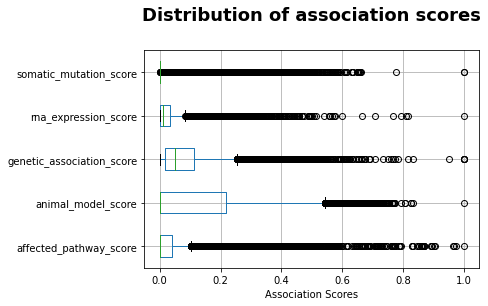

In [9]:
asso = df.loc[:,['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score','somatic_mutation_score']]
bx = asso.boxplot(vert=False)
bx.set_title("Distribution of association scores", {'fontsize': 18, 'weight' : 'bold'}, pad=30)
bx.set_xlabel("Association Scores")

Text(0.5, 0, 'Association Scores')

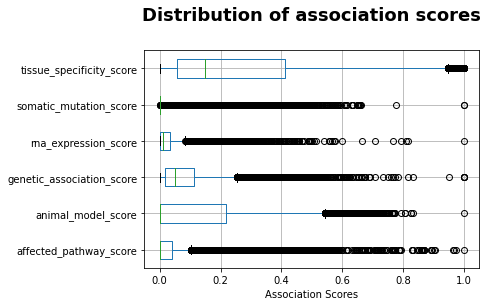

In [ ]:
asso = df.loc[:,['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score','somatic_mutation_score', 'tissue_specificity_score']]
asso.tissue_specificity_score = 1-asso.tissue_specificity_score
bx = asso.boxplot(vert=False)
bx.set_title("Distribution of association scores", {'fontsize': 18, 'weight' : 'bold'}, pad=30)
bx.set_xlabel("Association Scores")

Text(0.5, 0, 'Association Scores')

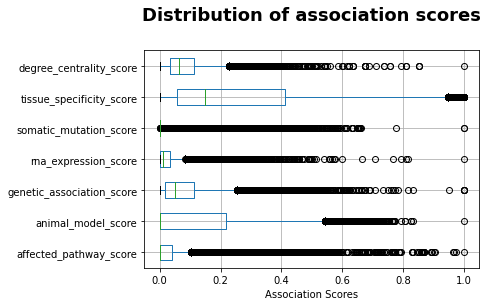

In [ ]:
asso = df.loc[:,['affected_pathway_score', 'animal_model_score', 'genetic_association_score', 'rna_expression_score','somatic_mutation_score', 'tissue_specificity_score', 'degree_centrality_score']]
asso.tissue_specificity_score = 1-asso.tissue_specificity_score
bx = asso.boxplot(vert=False)
bx.set_title("Distribution of association scores", {'fontsize': 18, 'weight' : 'bold'}, pad=30)
bx.set_xlabel("Association Scores")

In [ ]:
df.onco_driven_score.value_counts()

0.0    11010
1.0     7225
Name: onco_driven_score, dtype: int64

Great - our final dataset contains 18'616 genes which corresponds roughly to the total number of available protein coding genes [19'331](https://www.genenames.org/tools/search/#!/?query=&rows=20&start=0&filter=document_type:gene)

Next, we define the ground truth labels for this combined datasets based on the 'TARGETSTATUS' column were:
  - target = ['Clinical Trial target', 'Successful target', 'Patented target']
  - no_target = ['Discontinued target', np.nan]
  - unknown_target = ['Research target']

Thereby, target is our positive and no-targets our negative labels to train the models. the unknown targets will be used to predict how likely these are to become the next true target. All of these unknown targets are already under investigational exploration in research, and we want to weight them how likely they are to become the next successful targets based on their current properties. 

In [10]:
 
print(df.shape)

target = ['Clinical Trial target', 'Successful target', 'Patented target']
no_target = ['Discontinued target', np.nan]
unknown_target = ['Research target']

df["TARGETSTATUS"] = 0
df.loc[df.TARGTYPE.isin(target), "TARGETSTATUS"] = "target"
df.loc[df.TARGTYPE.isin(no_target), "TARGETSTATUS"] = "no-target"
df.loc[df.TARGTYPE.isin(unknown_target), "TARGETSTATUS"] = "unknown-target"

df.drop(columns="TARGTYPE", inplace=True)


(18235, 9)


<class 'pandas.core.frame.DataFrame'>
Index: 18235 entries, NF1 to ANKHD1-EIF4EBP3
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   affected_pathway_score     18235 non-null  float64
 1   animal_model_score         18235 non-null  float64
 2   genetic_association_score  18235 non-null  float64
 3   rna_expression_score       18235 non-null  float64
 4   somatic_mutation_score     18235 non-null  float64
 5   degree_centrality_score    18235 non-null  float64
 6   tissue_specificity_score   18235 non-null  float64
 7   onco_driven_score          18235 non-null  float64
 8   TARGETSTATUS               18235 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.4+ MB


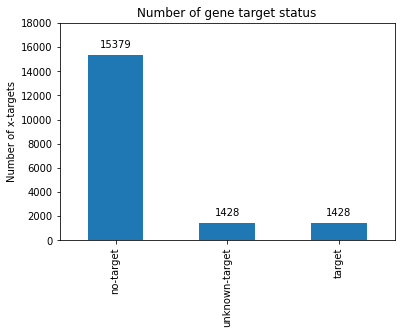

In [11]:

ax = df.TARGETSTATUS.value_counts().plot.bar(ylim=[0,18000], ylabel="Number of x-targets")
ax.set_title("Number of gene target status")

for p in ax.patches:
  ax.annotate(np.round(p.get_height(),decimals=0), (p.get_x()+p.get_width()/2., 
  p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

df.info()

As expected, we have a very imbalanced dataset.

### 1.5) Dimensional Reduction

To see if there is some signal that would cluster known-targets with some potential unknown targets that might have a high predictability to become the next target and cluster no-targets together as negative results we are performing some dimensional reduction methods.

#### 1.5.1) Import more libraries

In [12]:
# import more modules
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

!pip install umap-learn
import umap.umap_ as umap

!pip install hdbscan
import hdbscan


import seaborn as sns
import matplotlib.pyplot as plt


     |████████████████████████████████| 80 kB 5.0 MB/s 
     |████████████████████████████████| 1.1 MB 16.4 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=45bff1a422e19b273c0b919044fe2d03a7727f777e665bce6c1c9249e5fc2222
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.4-py3-none-any.whl size=52373 sha256=af3bcf4653a6ffc7c6ded0cd28729980985617f59c80d44c6b49d03d30231d16
  Stored in directory: /root/.cache/pip/wheels/d0/5b/62/3401692ddad12324249c774c4b15ccb046946021e2b581c043
Successfully built umap-learn pynndescent
     |████████████████████████████████| 6.4 MB 8.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311880 sha256=3544137cd468d17747c7380ee5d0

First, we need to drop all the missing values and scale all the features to perform the dimensional reduction methods. 

In [ ]:
df.new = df.copy().dropna(subset=[n for n in df if n != 'TARGETSTATUS']) # there are no missing values do not need to perform this

# Separating out the features - numeric and the labels - categorigal
x = df.new.select_dtypes(include=[np.float])
y = df.new['TARGETSTATUS']
# Standardizing the features
x = StandardScaler().fit_transform(x)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


KeyError: ignored

#### 1.5.2) Principal Component Analysis (PCA)
Principal Component Analysis or PCA is a linear feature extraction technique. It performs a linear mapping of the data to a lower-dimensional space in such a way that the variance of the data in the low-dimensional representation is maximized. It does so by calculating the eigenvectors from the covariance matrix. The eigenvectors that correspond to the largest eigenvalues (the principal components) are used to reconstruct a significant fraction of the variance of the original data.

In simpler terms, PCA combines your input features in a specific way that you can drop the least important feature while still retaining the most valuable parts of all the features. As an added benefit, each of the new features or components created after PCA are all independent of one another as they are orthogonal.

Explained variation per principal component: [0.1959623  0.15268082 0.14675985]
Cumulative explained variation for 50 principal components: 0.4954029754913384


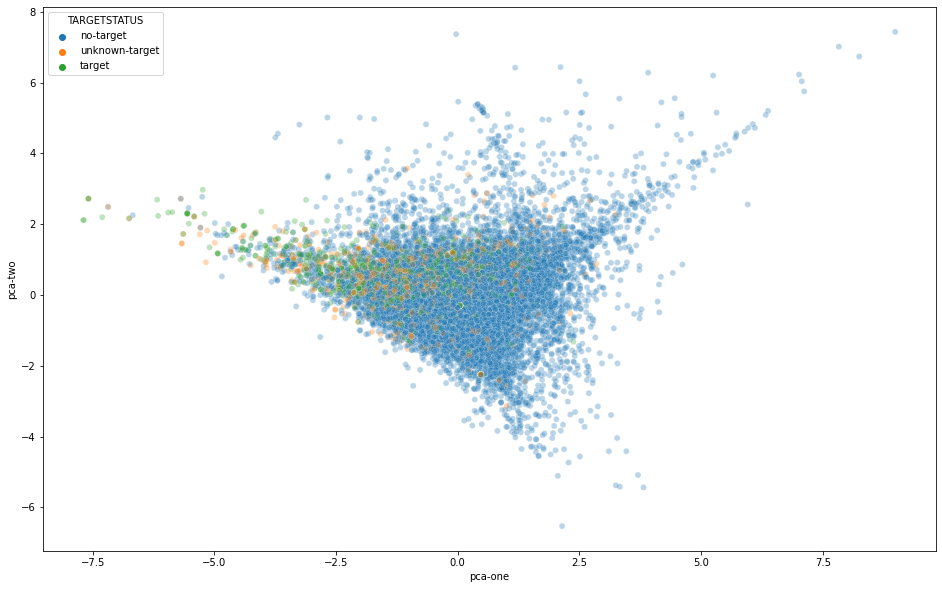

In [ ]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(x)
df.new['pca-one'] = pca_result[:,0]
df.new['pca-two'] = pca_result[:,1] 
df.new['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
print('Cumulative explained variation for 50 principal components: {}'.format(np.sum(pca.explained_variance_ratio_)))



plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="TARGETSTATUS",
    #palette=sns.color_palette("hls", 10),
    data=df.new,
    legend="full",
    alpha=0.3
)

we can see that the PCA which is capturing only the global variation of the dataset is not ideal to find a separation between targets and non-targets. But it looks there is a trend visible were all the targets are enriched in the left side of PCA1 representing the most important component explaining19% of the whole dataset


Maybe we see a bit more convincing visual representation when looking at more local variations.

#### 1.5.3) t-SNE (t-Distributed Stochastic Neighbor Embedding)
t-SNE is a non-linear method that also reduce the dimensionality of a dataset. One of the most major differences between PCA and t-SNE is it preserves only local similarities whereas PCA preserves large pairwise distance maximize variance (global variance/similarity).

The algorithms starts by calculating the probability of similarity of points in high-dimensional space and calculating the probability of similarity of points in the corresponding low-dimensional space. The similarity of points is calculated as the conditional probability that a point A would choose point B as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian (normal distribution) centered at A.
It then tries to minimize the difference between these conditional probabilities (or similarities) in higher-dimensional and lower-dimensional space for a perfect representation of data points in lower-dimensional space.
To measure the minimization of the sum of difference of conditional probability t-SNE minimizes the sum of Kullback-Leibler divergence of overall data points using a gradient descent method.

In simpler terms, t-SNE minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

In this way, t-SNE maps the multi-dimensional data to a lower dimensional space and attempts to find patterns in the data by identifying observed clusters based on similarity of data points with multiple features. However, after this process, the input features are no longer identifiable, and you cannot make any inference based only on the output of t-SNE. Hence it is mainly a data exploration and visualization technique.



(18235, 2)


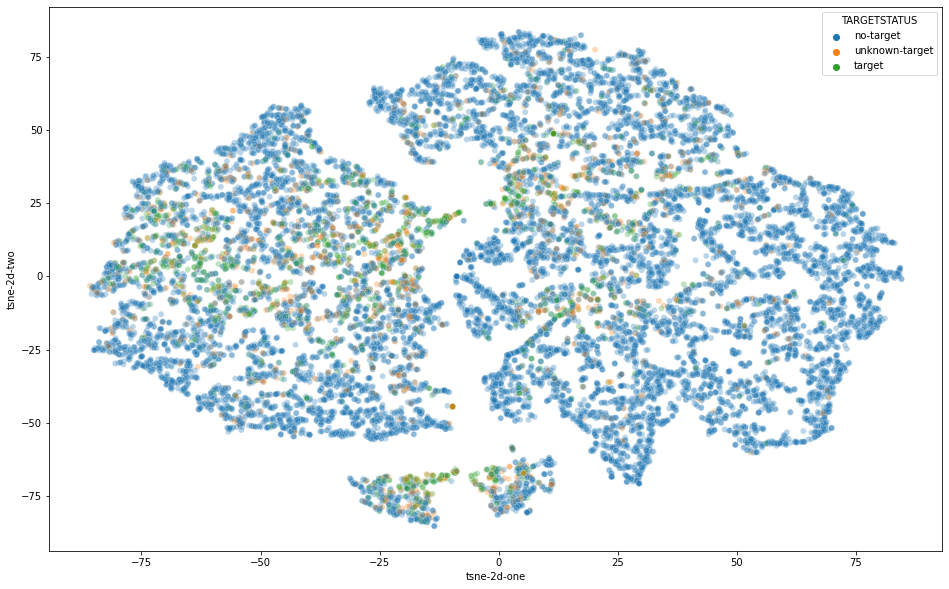

In [ ]:
X_embedded = TSNE(n_components=2,perplexity=30).fit_transform(x)
print(X_embedded.shape)

df.new['tsne-2d-one'] = X_embedded[:,0]
df.new['tsne-2d-two'] = X_embedded[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="TARGETSTATUS",
    #palette=sns.color_palette("hls", 10),
    data=df.new,
    legend="full",
    alpha=0.3
)

it seems that we see some signal that nicely clusters known targets with some unknown targets and no-targets rather separate.

How would we see it on a UMAP projection

####1.5.4) UMAP ( Uniform Manifold Approximation and Projection )
Uniform Manifold Approximation and Projection created in 2018 by ([Leland McInnes, John Healy, James Melville](https://arxiv.org/abs/1802.03426)) is a general-purpose manifold learning and dimension reduction algorithm.
UMAP is also a nonlinear dimensionality reduction method, it is very effective for visualizing clusters or groups of data points and their relative proximities.
The significant difference with TSNE is 

- *scalability*, it can be applied directly to sparse matrices thereby eliminating the need to applying any Dimensionality reduction such as PCA or Truncated SVD(Singular Value Decomposition) as a prior pre-processing step.
Put simply, it is similar to t-SNE but with probably higher processing speed, therefore, faster and probably better visualization. 

- interpretability, of the distance between objects or "clusters". I use the quotation marks since both algorithms are not meant for clustering - they are meant for visualization mostly. As we have learned t-SNE preserves local structure in the data. UMAP claims (by authors https://arxiv.org/pdf/1802.03426.pdf) to preserve both local and most of the global structure in the data. 
This means with t-SNE you cannot interpret the distance between clusters A and B at different ends of your plot. You cannot infer that these clusters are more dissimilar than A and C, where C is closer to A in the plot. But within cluster A, you can say that points close to each other are more similar objects than points at different ends of the cluster image.
With UMAP, you should be able to interpret both the distances between positions of points and clusters.

Both algorithms are highly stochastic and very much dependent on choice of hyperparameters (t-SNE even more than UMAP) and can yield very different results in different runs, so your plot might obfuscate an information in the data that a subsequent run might reveal.

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


(18235, 2)


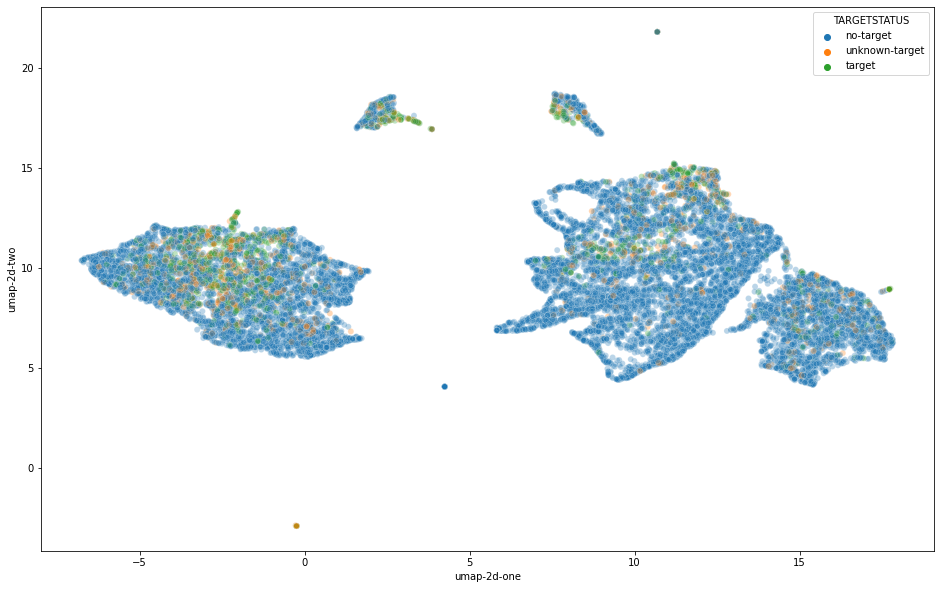

In [ ]:
embedding = umap.UMAP(random_state=42).fit_transform(x)

print(embedding.shape)

df.new['umap-2d-one'] = embedding[:,0]
df.new['umap-2d-two'] = embedding[:,1]

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="TARGETSTATUS",
    #palette=sns.color_palette("hls", 10),
    data=df.new,
    legend="full",
    alpha=0.3
)

This result shows that a distinction between therapeutic targets and other genes may exist based on our integrated feature space, thus supporting the notion of a non-linear classification-based approach that discriminates between targets and non-targets using disease-association/safety evidence.

This looks even more promising! Looks like we have some patterns that we want to cluster on and check how frequent our targets are represented there.

Let's apply HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

#### 1.5.4) Clustering using HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise)

HDBSCAN uses a density-based approach which makes few implicit assumptions about the clusters. It is a non-parametric method that looks for a cluster hierarchy shaped by the multivariate modes of the underlying distribution. Rather than looking for clusters with a particular shape, it looks for regions of the data that are denser than the surrounding space. The mental image you can use is trying to separate the islands from the sea or mountains from its valleys.

So, there is no assumptions made on the shape or number of clusters such as for k-means and so on 



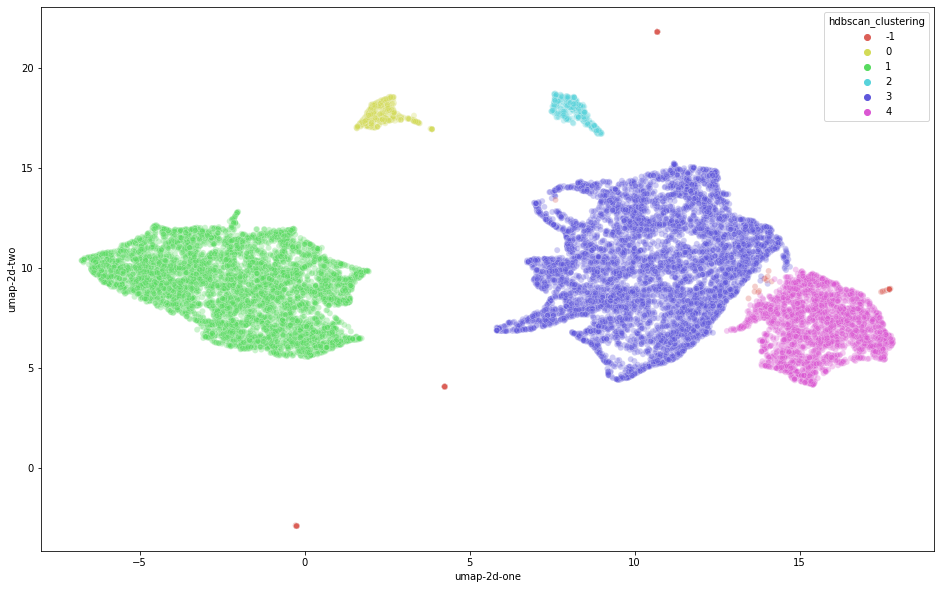

In [ ]:
labels = hdbscan.HDBSCAN(
    min_samples=10,
    min_cluster_size=50,
).fit_predict(embedding)


df.new["hdbscan_clustering"] = labels

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="umap-2d-one", y="umap-2d-two",
    hue="hdbscan_clustering",
    palette=sns.color_palette("hls", len(np.unique(labels))),
    data=df.new,
    legend="full",
    alpha=0.3
)


project the clustering on the t-SNE plot

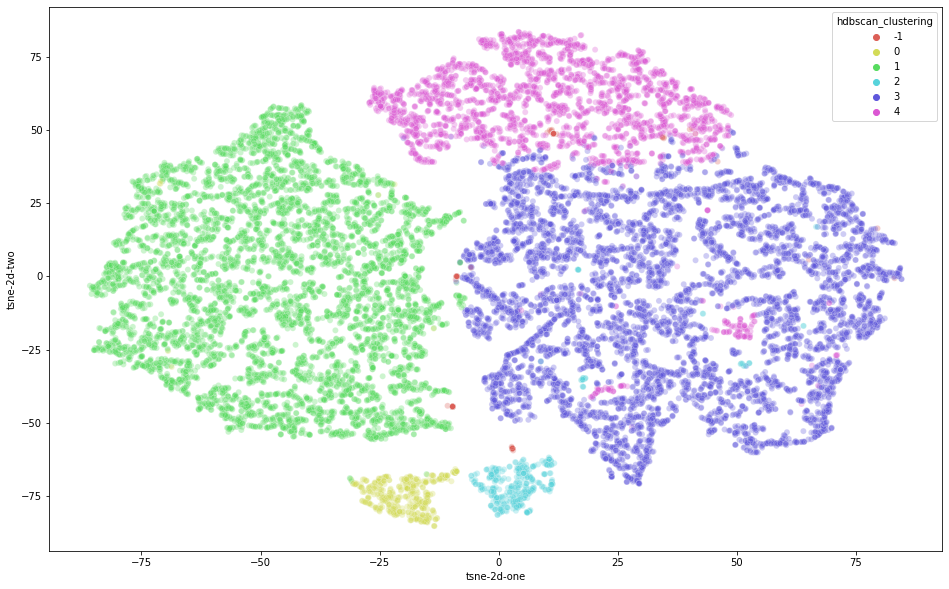

In [ ]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="hdbscan_clustering",
    palette=sns.color_palette("hls", len(np.unique(labels))),
    data=df.new,
    legend="full",
    alpha=0.3
)

Seems both tSNE and UMAP are showing around 5 distinct clusters. Manually viewing these plot one would probably say there might be one more cluster which separates the green cluster even further.

Now let's check the distribution of each category in the different clusters.

In [ ]:
container = df.new.groupby("hdbscan_clustering").TARGETSTATUS.value_counts().copy()

for i,j in zip(df.new.groupby("hdbscan_clustering").TARGETSTATUS.value_counts().index, df.new.groupby("hdbscan_clustering").TARGETSTATUS.value_counts()):

  if 'target' in i:
    container[i] = j / 1428 * 100
    
  elif 'no-target' in i:
    container[i] = j/15379*100
  else:
    container[i] = j/1428*100

c

NameError: ignored

In [ ]:
df.new.groupby("hdbscan_clustering").TARGETSTATUS.value_counts()

hdbscan_clustering  TARGETSTATUS  
-1                  target              41
                    no-target           35
                    unknown-target      29
 0                  no-target          247
                    target             118
                    unknown-target      74
 1                  no-target         5291
                    target             754
                    unknown-target     716
 2                  no-target          298
                    target              63
                    unknown-target      60
 3                  no-target         6927
                    unknown-target     385
                    target             340
 4                  no-target         2581
                    unknown-target     164
                    target             112
Name: TARGETSTATUS, dtype: int64

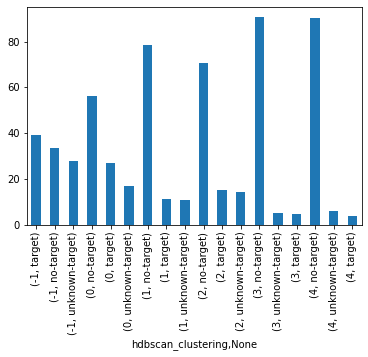

In [ ]:
df.new.groupby("hdbscan_clustering").apply(lambda x: x.TARGETSTATUS.value_counts()/np.sum(x.TARGETSTATUS.value_counts())*100).plot.bar()

puh - the non-target group is really dominating most of the clusters - let's see how it looks when we try to make some predictions

# 2) Prediction

## 2.1) Import libraries

In [13]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
import re

# models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

## 2.2) Split the dataset into a working and predicting dataset.

In [14]:
df.head()

affected_pathway_score  ...    TARGETSTATUS
SYMBOL                           ...                
NF1                    0.075665  ...       no-target
ABCC6                  0.122660  ...       no-target
AKT2                   0.091856  ...  unknown-target
NSDHL                  0.000000  ...       no-target
RNASET2                0.000000  ...       no-target

[5 rows x 9 columns]

In [15]:
n = 60
df2 = df.dropna().copy()

print("###"*n)
print("### We are droping {} genes because they contained missing values".format(df.shape[0] - df.dropna().shape[0]))
print("### Before droping NaN: {}\n\n{}\n### After droping NaN: {}\n\n{}".format(df.shape, df.TARGETSTATUS.value_counts(), df2.shape, df2.TARGETSTATUS.value_counts()))
print("###"*n)


df = df2

####################################################################################################################################################################################
### We are droping 0 genes because they contained missing values
### Before droping NaN: (18235, 9)

no-target         15379
unknown-target     1428
target             1428
Name: TARGETSTATUS, dtype: int64
### After droping NaN: (18235, 9)

no-target         15379
unknown-target     1428
target             1428
Name: TARGETSTATUS, dtype: int64
####################################################################################################################################################################################


**set prediction dataset**

In [16]:
df_pred = df[df.TARGETSTATUS == "unknown-target"].copy()

df_pred.shape

(1428, 9)

**set working dataset**

In [17]:
df_work = df[df.TARGETSTATUS != "unknown-target"].copy()
print(df_work.shape)
df_work.TARGETSTATUS.value_counts()

(16807, 9)


no-target    15379
target        1428
Name: TARGETSTATUS, dtype: int64

**very imbalanced classes in the working dataset!**

test 4 main approaches that deals with that issue:
  
  - 1) Down-sampling of majority class
  
  - 2) Up-sampling of minority class
  
  - 3) Change your performance metric from accuracy to ROC  
  
  - 4) Penalize algorithms (cost-sensitive training)

**1) Down-sampling**

Down-sampling involves randomly removing observations from the majority class to prevent its signal from dominating the learning algorithm.

The most common heuristic for doing so is resampling without replacement.

In [18]:
seed = 42

# Separate majority and minority classes
df_majority = df_work[df_work.TARGETSTATUS=="no-target"].copy()
df_minority = df_work[df_work.TARGETSTATUS=="target"].copy()

 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=len(df_minority),     # to match minority class
                                 random_state=seed) # reproducible results
 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# Display new class counts
df_downsampled.TARGETSTATUS.value_counts()

target       1428
no-target    1428
Name: TARGETSTATUS, dtype: int64

**2) Up-sampling**

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.

There are several heuristics for doing so, but the most common way is to simply resample with replacement.

In [19]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.TARGETSTATUS.value_counts()

no-target    15379
target       15379
Name: TARGETSTATUS, dtype: int64

### 2.2.1) working dataset - split into training and test dataset

**original imbalanced dataset**

In [20]:
X = df_work.drop(columns="TARGETSTATUS").copy()
y = df_work.TARGETSTATUS.copy()

# split into train test sets
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

# Standardizing the features
X_train_imb =sc.fit_transform(X_train_imb)
X_test_imb = sc.transform(X_test_imb)

print("#"*60)
print("### Imbalanced-Sampling\n{}\n### X-train: {}\n### y-train: {}\n###\n### y_train label frequncy:\n{}\n{}\n### X-test:  {}\n### y-test:  {}\n###\n### y-test label frequency \n{}".format("#"*60, X_train_imb.shape, y_train_imb.shape, y_train_imb.value_counts(), "#"*60, X_test_imb.shape,  y_test_imb.shape,y_test_imb.value_counts()))
print("#"*60)

############################################################
### Imbalanced-Sampling
############################################################
### X-train: (13445, 8)
### y-train: (13445,)
###
### y_train label frequncy:
no-target    12276
target        1169
Name: TARGETSTATUS, dtype: int64
############################################################
### X-test:  (3362, 8)
### y-test:  (3362,)
###
### y-test label frequency 
no-target    3103
target        259
Name: TARGETSTATUS, dtype: int64
############################################################


In [21]:
pd.DataFrame(X_train_imb).describe()

0             1  ...             6             7
count  1.344500e+04  1.344500e+04  ...  1.344500e+04  1.344500e+04
mean   1.541761e-16  2.215818e-15  ... -4.955335e-17 -8.287243e-17
std    1.000037e+00  1.000037e+00  ...  1.000037e+00  1.000037e+00
min   -4.140725e-01 -6.778866e-01  ... -2.451284e+00 -7.867047e-01
25%   -4.140725e-01 -6.778866e-01  ... -4.712765e-01 -7.867047e-01
50%   -4.140725e-01 -6.778866e-01  ...  4.531495e-01 -7.867047e-01
75%   -2.667056e-02  4.966787e-01  ...  7.668327e-01  1.271125e+00
max    9.927746e+00  4.886019e+00  ...  9.506024e-01  1.271125e+00

[8 rows x 8 columns]

**1) Down-sampling**

In [22]:
X = df_downsampled.drop(columns="TARGETSTATUS")
y = df_downsampled.TARGETSTATUS

# split into train test sets
X_train_down, X_test_down, y_train_down, y_test_down = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

# Standardizing the features
X_train_down = sc.fit_transform(X_train_down)
X_test_down = sc.transform(X_test_down)

print("#"*60)
print("### Down-Sampling\n{}\n### X-train: {}\n### y-train: {}\n###\n### y_train label frequncy:\n{}\n{}\n### X-test:  {}\n### y-test:  {}\n###\n### y-test label frequency \n{}".format("#"*60, X_train_down.shape, y_train_down.shape, y_train_down.value_counts(), "#"*60, X_test_down.shape,  y_test_down.shape,y_test_down.value_counts()))
print("#"*60)

############################################################
### Down-Sampling
############################################################
### X-train: (2284, 8)
### y-train: (2284,)
###
### y_train label frequncy:
target       1151
no-target    1133
Name: TARGETSTATUS, dtype: int64
############################################################
### X-test:  (572, 8)
### y-test:  (572,)
###
### y-test label frequency 
no-target    295
target       277
Name: TARGETSTATUS, dtype: int64
############################################################


**2) Up-sampling**

In [23]:
X = df_upsampled.drop(columns="TARGETSTATUS")
y = df_upsampled.TARGETSTATUS

# split into train test sets
X_train_up, X_test_up, y_train_up, y_test_up = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

X_train_up = sc.fit_transform(X_train_up)
X_test_up = sc.transform(X_test_up)
print("#"*60)
print("### Up-Sampling\n{}\n### X-train: {}\n### y-train: {}\n###\n### y_train label frequncy:\n{}\n{}\n### X-test:  {}\n### y-test:  {}\n###\n### y-test label frequency \n{}".format("#"*60, X_train_up.shape, y_train_up.shape, y_train_up.value_counts(), "#"*60, X_test_up.shape,  y_test_up.shape,y_test_up.value_counts()))
print("#"*60)

############################################################
### Up-Sampling
############################################################
### X-train: (24606, 8)
### y-train: (24606,)
###
### y_train label frequncy:
target       12344
no-target    12262
Name: TARGETSTATUS, dtype: int64
############################################################
### X-test:  (6152, 8)
### y-test:  (6152,)
###
### y-test label frequency 
no-target    3117
target       3035
Name: TARGETSTATUS, dtype: int64
############################################################


### 2.2.2) Evaluate the down, up & imbalanced-sample approach on accuracy

In [ ]:

all_scores = pd.DataFrame(["cross-val: " + str(i) for i in range(10)]+["test-accuracy"], columns=["index"]).set_index("index")
all_scores
n = 120
for X_tr,y_tr,X_te,y_te,status in [(X_train_down, y_train_down, X_test_down, y_test_down, "Down"), (X_train_up, y_train_up, X_test_up, y_test_up, "Up"),
                                   (X_train_imb, y_train_imb, X_test_imb, y_test_imb, "Imbalanced")]:
  # Is our model still predicting just one class?
  print("#"*n)
  print("#"*n)
  print("### Here are our labels:\n###\n### {}.".format(np.unique(y_train_down)))
  print("#"*n)


  for m in ["LogisticRegression()", "GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0)",
            "RandomForestClassifier(max_depth=2, random_state=42)", 
            #"DecisionTreeClassifier()", "SVC(kernel='linear', probability=True)",
            "DummyClassifier(strategy='stratified', random_state=42)", "DummyClassifier(strategy='uniform', random_state=42)"]:
    # Train model
    model = eval(m) 
    model = model.fit(X_tr,y_tr)
    # Predict on test set
    pred_model = model.predict(X_te)

    # 10x cross-validation on train set only
    cross_scores = cross_val_score(eval(m), X_tr, y_tr, cv=10)
    scores = pd.Series(cross_scores, index=["cross-val: " + str(i) for i in range(10)])
    print("#"*n) 
    print("### {} on {}-sampled data".format(m, status))
    
    print("#"*n)
    print("### Here is our accuracy with 10x cross-validation on train set:\n###\n### min: {}\n### mean: {}\n### max: {}".format(scores[scores.index != "test-accuracy"].min(), scores[scores.index != "test-accuracy"].mean(), scores[scores.index != "test-accuracy"].max()))
    print("#"*3)
    # How's our accuracy?
    print("### Here is our accuracy on test set:\n###\n### {}".format(accuracy_score(y_te, pred_model) ))
    print("#"*3,"\n### Confusion-matrix")

    conf = pd.DataFrame(confusion_matrix(y_te, pred_model), index=["no-target", "target"], columns=["pred: no-target", "pred: target"])
    print(conf)

    scores["test-accuracy"] = accuracy_score(y_te, pred_model)

    colname = re.search('(.*?)\(.*', m).group(1)
    if "uniform" in m:
      all_scores = all_scores.merge(scores.to_frame(name="UniformClassifier: "+ status + "-sampled"), left_index=True, right_index=True)
    elif "stratified" in m:
      all_scores = all_scores.merge(scores.to_frame(name="StratifiedClassifier: "+ status + "-sampled"), left_index=True, right_index=True)
    else:
      all_scores = all_scores.merge(scores.to_frame(name=colname +": "+status + "-sampled"), left_index=True, right_index=True)
  
    

########################################################################################################################
########################################################################################################################
### Here are our labels:
###
### ['no-target' 'target'].
########################################################################################################################
########################################################################################################################
### LogisticRegression() on Down-sampled data
########################################################################################################################
### Here is our accuracy with 10x cross-validation on train set:
###
### min: 0.706140350877193
### mean: 0.7512928062514364
### max: 0.8034934497816594
###
### Here is our accuracy on test set:
###
### 0.7395104895104895
### 
### Confusion-matrix
           pred: no-target  pred: target
no-

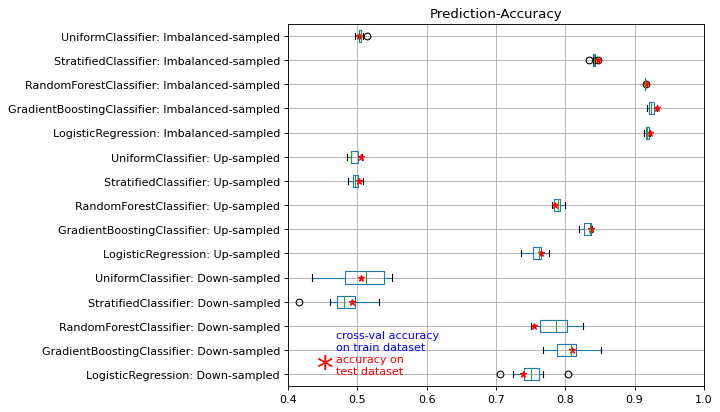

In [ ]:
#from matplotlib.pyplot import figure

plt.figure(figsize=(8, 6), dpi=80)

box = all_scores.boxplot(vert=False)
plt.xlim([0.4,1])
plt.title("Prediction-Accuracy")
# df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)

for x,y in enumerate((all_scores[all_scores.index == "test-accuracy"]).loc["test-accuracy"]):
    
    plt.plot(y, x+1, '*r', alpha=1)
plt.annotate("accuracy on \ntest dataset", xy= (0.47,1), color="red")
plt.annotate("*",  xy= (0.44,0.8), fontsize=30, color="red")
plt.annotate("cross-val accuracy\non train dataset", xy= (0.47,2), color="blue")

plt.show()



Overall, one can see the clear danger of an imbalanced dataset with the wrong metrics where a dummy stratified classifier can have an accuracy of 0.84. The classifiers may learn rather which are the majority class instead of the real differences between the two classes. The same might be true with a Dummy Classifier that always votes for the majority class.

We can see that by the up-sample or down-sample approach we are dealing nicely with the imbalanced dataset - illustrated with the worsening of the stratified Dummy Classifier.

One can also appreciate that the decision tree classification methods were superior in the Up-Sampled scenario with un trustable accuracies above 90%. This looks very suspicious and like a huge overfitting problem which is known to be easily done using decision trees. However, the testing dataset suggests that there is no overfitting issue - which looks much more suspicious to us as we cannot believe such incredible accuracies.

The other classification accuracies for the up and down-sampled scenario looks a bit more realistic between 0.7-0.8 with great generalisabilities.


Overall, we feel that balancing the dataset before fitting the model is a bad solution as it biases your model and even worse in the down-sampled scenario throws out potentially useful data.

Therefore, we also want to have a look at 3 different approaches.

**3) Change your performance metric from accuracy to ROC**

So far, we've looked at two ways of addressing imbalanced classes by resampling the dataset. Next, we'll look at using other performance metrics for evaluating the models.

Albert Einstein once said, "if you judge a fish on its ability to climb a tree, it will live its whole life believing that it is stupid." This quote really highlights the importance of choosing the right evaluation metric.

For a general-purpose metric for classification, we recommend Area Under ROC Curve (AUROC).


Intuitively, AUROC represents the likelihood of your model distinguishing observations from two classes.

In other words, if you randomly select one observation from each class, what's the probability that your model will be able to "rank" them correctly?

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

all_scores = pd.DataFrame(["cross-val: " + str(i) for i in range(10)]+["test-ROC"], columns=["index"]).set_index("index")
all_scores
n = 120
for X_tr,y_tr,X_te,y_te,status in [(X_train_down, y_train_down, X_test_down, y_test_down, "Down"), (X_train_up, y_train_up, X_test_up, y_test_up, "Up"),
                                   (X_train_imb, y_train_imb, X_test_imb, y_test_imb, "Imbalanced")]:
  # Is our model still predicting just one class?
  print("#"*n)
  print("#"*n)
  print("### Here are our labels:\n###\n### {}.".format(np.unique(y_train_down)))
  print("#"*n)


  for m in ["LogisticRegression()", "GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42)",
            "RandomForestClassifier(max_depth=2, random_state=42)", 
            #"DecisionTreeClassifier()", #"SVC(kernel='linear', probability=True)",
            "DummyClassifier(strategy='stratified', random_state=42)", "DummyClassifier(strategy='uniform', random_state=42)"]:
    # Train model
    model = eval(m) 
    model = model.fit(X_tr,y_tr)
    # Predict on test set
    pred_model = model.predict_proba(X_te)

   

    # 10x cross-validation on train set only
    cross_scores = cross_val_score(eval(m), X_tr, y_tr, cv=10, scoring="roc_auc")
    scores = pd.Series(cross_scores, index=["cross-val: " + str(i) for i in range(10)])
    print("#"*n) 
    print("### {} on {}-sampled data".format(m, status))
    print("#"*n)
    print("### Here is our accuracy with 10x cross-validation on train set:\n###\n### min: {}\n### mean: {}\n### max: {}".format(scores[scores.index != "test-accuracy"].min(), scores[scores.index != "test-accuracy"].mean(), scores[scores.index != "test-accuracy"].max()))
    print("#"*3)
    # How's our accuracy?
    print("### Here is our AUROC on test set:\n###\n### {}".format(roc_auc_score(y_te, pred_model[:,1]) ))
   
    scores["test-ROC"] = roc_auc_score(y_te, pred_model[:,1])

    colname = re.search('(.*?)\(.*', m).group(1)
    if "uniform" in m:
      all_scores = all_scores.merge(scores.to_frame(name="UniformClassifier: "+ status + "-sampled"), left_index=True, right_index=True)
    elif "stratified" in m:
      all_scores = all_scores.merge(scores.to_frame(name="StratifiedClassifier: "+ status + "-sampled"), left_index=True, right_index=True)
    else:
      all_scores = all_scores.merge(scores.to_frame(name=colname +": "+status + "-sampled"), left_index=True, right_index=True)
  
    


########################################################################################################################
########################################################################################################################
### Here are our labels:
###
### ['no-target' 'target'].
########################################################################################################################
########################################################################################################################
### LogisticRegression() on Down-sampled data
########################################################################################################################
### Here is our accuracy with 10x cross-validation on train set:
###
### min: 0.7971527510580992
### mean: 0.8307089824660879
### max: 0.8762013729977116
###
### Here is our AUROC on test set:
###
### 0.8335004892367905
########################################################################

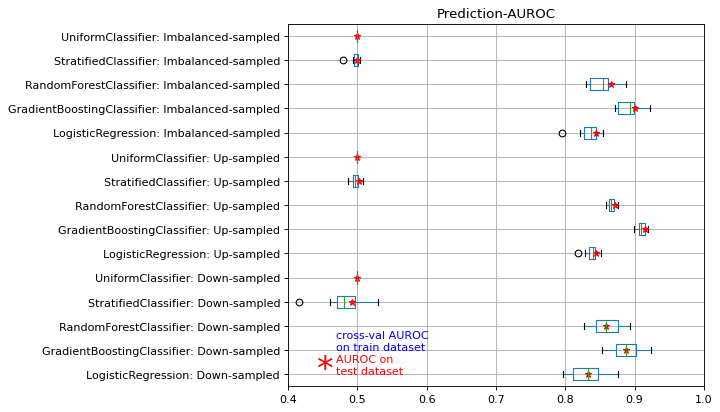

In [ ]:
#from matplotlib.pyplot import figure

plt.figure(figsize=(8, 6), dpi=80)

box = all_scores.boxplot(vert=False)
plt.xlim([0.4,1])
plt.title("Prediction-AUROC")
# df.T.boxplot(vert=False)
plt.subplots_adjust(left=0.25)

for x,y in enumerate((all_scores[all_scores.index == "test-ROC"]).loc["test-ROC"]):
    
    plt.plot(y, x+1, '*r', alpha=1)
plt.annotate("AUROC on \ntest dataset", xy= (0.47,1), color="red")
plt.annotate("*",  xy= (0.44,0.8), fontsize=30, color="red")
plt.annotate("cross-val AUROC\non train dataset", xy= (0.47,2), color="blue")

plt.show()



one can appreciate the worse performance in the imbalanced dataset of the stratified classifier on the right metric - AUROC! SO that works conceptually!

In addition, one can see only slight deviation between the imbalanced up and down-sampled situation on which I would prefer to keep the original imbalanced dataset.

Here we see the best performing methods are logistic regression followed by random forest and gradient boosting classifier - looking only at imbalanced dataset. Which all of the three perform equally good for all the three sample scenarios up,down and imbalanced.

The generalisability is still incredibly high for all the classifiers - which is really surprising, and we are worried that we have done something wrong.



# 2.2.3) Classifier accuracy using roc_curve

LogisticRegression: ROC AUC=0.837
GradientBoostingClassifier: ROC AUC=0.885
RandomForestClassifier: ROC AUC=0.856
DecisionTreeClassifier: ROC AUC=0.700
SVM: ROC AUC=0.820
Penalized-SVM: ROC AUC=0.840
DummyClassifier: ROC AUC=0.488


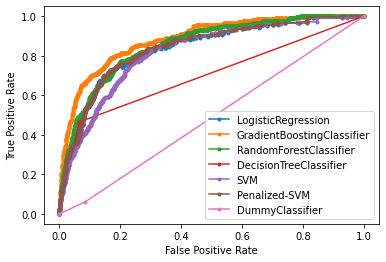

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.svm import SVC
n = 1

for m in ["LogisticRegression()", "GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0)", 
          "RandomForestClassifier(max_depth=2, random_state=42)", "DecisionTreeClassifier()",
          "SVC(kernel='linear', probability=True)", "SVC(kernel='linear', class_weight='balanced', probability=True)", 
          "DummyClassifier(strategy='stratified', random_state=42)"]:


  # fit a model
  model = eval(m)
  model.fit(X_train_imb, y_train_imb)

  colname = re.search('(.*?)\(.*', m).group(1)

  # predict probabilities
  lr_probs = model.predict_proba(X_test_imb)
  # keep probabilities for the positive outcome only
  lr_probs = lr_probs[:, 1]
  # calculate scores
  # ns_auc = roc_auc_score(testy, ns_probs)
  lr_auc = roc_auc_score(y_test_imb, lr_probs)
  # summarize scores
  # print('No Skill: ROC AUC=%.3f' % (ns_auc))
  if "SVC" in colname:
    if n == 1:
      colname = "SVM" 
      n += 1
    else:
      colname = "Penalized-SVM"
      
  
  print(colname + ': ROC AUC=%.3f' % (lr_auc))
  # calculate roc curves
  # ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), lr_probs)
  # plot the roc curve for the model
  # pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
  plt.plot(lr_fpr, lr_tpr, marker='.', label=colname)
  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  # show the legend
  plt.legend()
  # show the plot
  # plt.show()

These values are too good to be true - we are honestly thinking we have a data leaking problem but do not see where it came from. We have been here already with even better predictions and realized that we had data leaking through the features druggability/tractability because they had already kind of information assigned that included a target or non-target. Here we excluded these three features and still we see  very high predictions.

However, lets continue maybe we can see what was happening.

# 2.2.4) Gradient Boosting Classifier : Safety + Efficacy  Features vs only efficacy features 

One of our question was:

Can we improve the prediction if we add safety features to our models since people in the literature tend to look only at efficacy features instead of both? Is safety beneficial?

We will explore (using roc_curve) if the Gradient Boosting Classifier using Safety + Efficacy Features is more accurate than Efficacy alone


**GradientBoosting** - best performing classifier

No Skill: ROC AUC=0.517
efficay scores: ROC AUC=0.856
efficacy + safety scores: ROC AUC=0.879


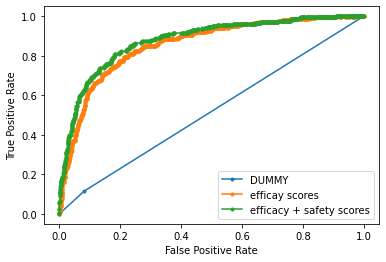

In [25]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict

# fit a model

  

saefty = ["tissue_specificity_score", "degree_centrality_score", "onco_driven_score"]
efficay = ["affected_pathway_score", "animal_model_score", "genetic_association_score", "rna_expression_score", "somatic_mutation_score"]
X_train_imb = pd.DataFrame(X_train_imb, columns=df.columns[:-1])
X_test_imb = pd.DataFrame(X_test_imb, columns=df.columns[:-1])


dummy = DummyClassifier(strategy='stratified', random_state=42).fit(X_train_imb.to_numpy(), y_train_imb)
effic =  GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train_imb.loc[:, efficay].to_numpy(), y_train_imb)
#safe =   GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train_imb.loc[:,saefty].to_numpy(), y_train_imb)
efic_safe =   GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=42).fit(X_train_imb.to_numpy(), y_train_imb)


colname = ["efficay scores", "safety scores", "efficacy + safety scores"]

# predict probabilities
du_probs = dummy.predict_proba(X_test_imb)[:,1]
e_probs = effic.predict_proba(X_test_imb.loc[:, efficay].to_numpy())[:,1]
#s_probs = safe.predict_proba(X_test_imb.loc[:,saefty])[:,1]
es_probs = efic_safe.predict_proba(X_test_imb)[:,1]


# # calculate scores
d_auc = roc_auc_score(y_test_imb, du_probs)
e_auc = roc_auc_score(y_test_imb, e_probs)
#s_auc = roc_auc_score(y_test_imb, s_probs)
es_auc = roc_auc_score(y_test_imb, es_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (d_auc))
print(colname[0] + ': ROC AUC=%.3f' % (e_auc))
#print(colname[1] + ': ROC AUC=%.3f' % (s_auc))
print(colname[2] + ': ROC AUC=%.3f' % (es_auc))

# calculate roc curves
d_fpr, d_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), du_probs)
e_fpr, e_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), e_probs)
#s_fpr, s_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), s_probs)
es_fpr, es_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), es_probs)
# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(d_fpr, d_tpr, marker='.', label="DUMMY")
plt.plot(e_fpr, e_tpr, marker='.', label=colname[0])
#plt.plot(s_fpr, s_tpr, marker='.', label=colname[1])
plt.plot(es_fpr, es_tpr, marker='.', label=colname[2])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
# plt.show()

Indeed, it seems that we can improve the predictability by combining the two feature space. However, we are really surprised at the high predictabilities by looking only at the safety features alone.

**RandomForest** - second best classifier

No Skill: ROC AUC=0.499
efficay scores: ROC AUC=0.849
efficacy + safety scores: ROC AUC=0.866


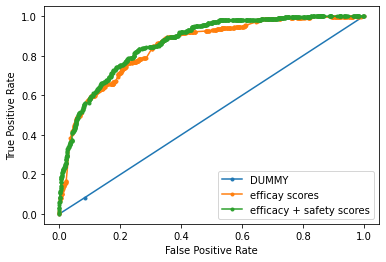

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC


# fit a model

  

saefty = ["tissue_specificity_score", "degree_centrality_score", "onco_driven_score"]
efficay = ["affected_pathway_score", "animal_model_score", "genetic_association_score", "rna_expression_score", "somatic_mutation_score"]
X_train_imb = pd.DataFrame(X_train_imb, columns=df.columns[:-1])
X_test_imb = pd.DataFrame(X_test_imb, columns=df.columns[:-1])


dummy = DummyClassifier(strategy='stratified', random_state=42).fit(X_train_imb.to_numpy(), y_train_imb)
effic =  RandomForestClassifier(max_depth=2, random_state=42).fit(X_train_imb.loc[:, efficay].to_numpy(), y_train_imb)
# safe =  RandomForestClassifier(max_depth=2, random_state=42).fit(X_train_imb.loc[:,saefty].to_numpy(), y_train_imb)
efic_safe =  RandomForestClassifier(max_depth=2, random_state=42).fit(X_train_imb.to_numpy(), y_train_imb)


colname = ["efficay scores", "safety scores", "efficacy + safety scores"]

# predict probabilities
du_probs = dummy.predict_proba(X_test_imb)[:,1]
e_probs = effic.predict_proba(X_test_imb.loc[:, efficay].to_numpy())[:,1]
# s_probs = safe.predict_proba(X_test_imb.loc[:,saefty])[:,1]
es_probs = efic_safe.predict_proba(X_test_imb)[:,1]


# # calculate scores
d_auc = roc_auc_score(y_test_imb, du_probs)
e_auc = roc_auc_score(y_test_imb, e_probs)
# s_auc = roc_auc_score(y_test_imb, s_probs)
es_auc = roc_auc_score(y_test_imb, es_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (d_auc))
print(colname[0] + ': ROC AUC=%.3f' % (e_auc))
# print(colname[1] + ': ROC AUC=%.3f' % (s_auc))
print(colname[2] + ': ROC AUC=%.3f' % (es_auc))

# calculate roc curves
d_fpr, d_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), du_probs)
e_fpr, e_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), e_probs)
# s_fpr, s_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), s_probs)
es_fpr, es_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), es_probs)
# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(d_fpr, d_tpr, marker='.', label="DUMMY")
plt.plot(e_fpr, e_tpr, marker='.', label=colname[0])
# plt.plot(s_fpr, s_tpr, marker='.', label=colname[1])
plt.plot(es_fpr, es_tpr, marker='.', label=colname[2])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
# plt.show()

The same trend was observed using the RandomForest classifier but to a weaker extent.

**LogisticRegression** - third best performing classifier

(3362,)
No Skill: ROC AUC=0.495
efficay scores: ROC AUC=0.699
efficacy + safety scores: ROC AUC=0.814


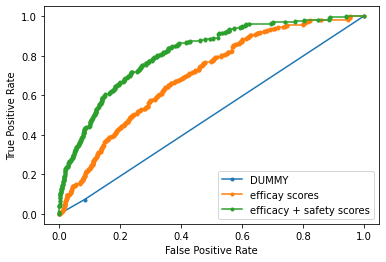

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.svm import SVC


# fit a model

  

saefty = ["tissue_specificity_score", "degree_centrality_score", "onco_driven_score"]
efficay = ["affected_pathway_score", "animal_model_score", "genetic_association_score", "rna_expression_score", "somatic_mutation_score"]
X_train_imb = pd.DataFrame(X_train_imb, columns=df.columns[:-1])
X_test_imb = pd.DataFrame(X_test_imb, columns=df.columns[:-1])


dummy = DummyClassifier(strategy='stratified', random_state=42).fit(X_train_imb.to_numpy(), y_train_imb)
effic = LogisticRegression().fit(X_train_imb.loc[:, efficay].to_numpy(), y_train_imb)
# safe = LogisticRegression().fit(X_train_imb.loc[:,saefty].to_numpy(), y_train_imb)
efic_safe =  LogisticRegression().fit(X_train_imb.to_numpy(), y_train_imb)


colname = ["efficay scores", "safety scores", "efficacy + safety scores"]

# predict probabilities
du_probs = dummy.predict_proba(X_test_imb)[:,1]
e_probs = effic.predict_proba(X_test_imb.loc[:, efficay].to_numpy())[:,1]
# s_probs = safe.predict_proba(X_test_imb.loc[:,saefty])[:,1]
es_probs = efic_safe.predict_proba(X_test_imb)[:,1]

print(e_probs.shape)
# # calculate scores
d_auc = roc_auc_score(y_test_imb, du_probs)
e_auc = roc_auc_score(y_test_imb, e_probs)
# s_auc = roc_auc_score(y_test_imb, s_probs)
es_auc = roc_auc_score(y_test_imb, es_probs)

# summarize scores
print('No Skill: ROC AUC=%.3f' % (d_auc))
print(colname[0] + ': ROC AUC=%.3f' % (e_auc))
# print(colname[1] + ': ROC AUC=%.3f' % (s_auc))
print(colname[2] + ': ROC AUC=%.3f' % (es_auc))

# calculate roc curves
d_fpr, d_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), du_probs)
e_fpr, e_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), e_probs)
# s_fpr, s_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), s_probs)
es_fpr, es_tpr, _ = roc_curve(y_test_imb.replace({"no-target": 0, "target":1}), es_probs)
# plot the roc curve for the model
# pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(d_fpr, d_tpr, marker='.', label="DUMMY")
plt.plot(e_fpr, e_tpr, marker='.', label=colname[0])
# plt.plot(s_fpr, s_tpr, marker='.', label=colname[1])
plt.plot(es_fpr, es_tpr, marker='.', label=colname[2])
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
# plt.show()

All three classifiers show the beneficial benefit of adding safety to efficacy.

The gradient boosting and random forest also show that efficacy alone has better AUROC than safety alone.

Only logistic regression show a rather unexpected result were the safety features are showing higher AUROC than efficacy alone and we do not know how we should interpret these results. 

Overall, these numbers are higher than expected and seem artificially high and the classifiers performed all well - even with such a small dataset - would be happy to hear from the instructional team what they feel what went wrong with our strong predictions.


**4) Penalize Algorithms (Cost-Sensitive Training)**

The next tactic is to use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

A popular algorithm for this technique is Penalized-SVM:

During training, we can use the argument class_weight='balanced'  to penalize mistakes on the minority class by an amount proportional to how under-represented it is.


In [26]:
from sklearn.svm import SVC


# # Train model
m_svc = SVC(probability=True)
m_svc_imp = SVC(kernel='linear', 
            class_weight='balanced', # penalize
            probability=True)
 
m_svc.fit(X_train_imb, y_train_imb)
m_svc_imp.fit(X_train_imb, y_train_imb)
  
# Predict on training set
pred_y_svc = m_svc.predict(X_test_imb)
pred_y_svc_imp = m_svc_imp.predict(X_test_imb)

# Is our model still predicting just one class?
print("class labels: " + np.unique( pred_y_svc ) )
print("class labels: " + np.unique( pred_y_svc_imp ) )
 
# How's our accuracy?
print("accuracy without penalty: {}".format(accuracy_score(y_test_imb, pred_y_svc) ))
print("accuracy with penalty: {}".format(accuracy_score(y_test_imb, pred_y_svc_imp) ))
print("#"* 70)
print("improvment of accuracy using penalty: {}\n\n".format(accuracy_score(y_test_imb, pred_y_svc_imp)-accuracy_score(y_test_imb, pred_y_svc) ))

 
# What about AUROC?
prob_y_svc = m_svc.predict_proba(X_test_imb)
prob_y_svc = [p[1] for p in prob_y_svc]

prob_y_svc_imp = m_svc_imp.predict_proba(X_test_imb)
prob_y_svc_imp = [p[1] for p in prob_y_svc_imp]

print("AUROC without penalty: {}".format(roc_auc_score(y_test_imb, prob_y_svc) ))
print("AUROC with penalty: {}".format(roc_auc_score(y_test_imb, prob_y_svc_imp) ))
print("#"*70)
print("improvment of AUROC using penalty: {}".format(roc_auc_score(y_test_imb, prob_y_svc_imp)-roc_auc_score(y_test_imb, prob_y_svc) ))


['class labels: no-target' 'class labels: target']
['class labels: no-target' 'class labels: target']
accuracy without penalty: 0.9289113622843546
accuracy with penalty: 0.7477691850089233
######################################################################
improvment of accuracy using penalty: -0.18114217727543125


AUROC without penalty: 0.7763977319246413
AUROC with penalty: 0.8279769111222545
######################################################################
improvment of AUROC using penalty: 0.05157917919761312


We can see that the accuracy without penalty was incredibly high and it seems it learned nicely how to vote for the majority class and we can see the 16% drop in accuracy by breaking this learning because we want that the classifier is really learning to separated based on the target properties than the frequencies of the targets in the dataset - so we still se it as an improvement and the 0.75 looks rather a realistic value.

On the AUROC we do not have this issue and therefore we can still see an improvement by 5% using the penalized method 

Also, this approach keeps the original imbalanced data and performance equally well as the random forest or logistic regression classifier.

For simplicity we proceed only with the top performing classifiers determined before

### 2.2.4) Optimal classification model: **1) 'RandomForest'**, **2) LogisticRegression'** & **3) GradientBoosting** under investigation 

#### 2.2.4.1) Feature importance



Another question we wanted to address was:

how important are the different features contributing to a target?
Do we also see the often postulated fact that a genetic evidence for a target is doubling the chance of the target to make it on the market? ([Nelson et al](https://www.nature.com/articles/ng.3314) or [King et al 2019](https://journals.plos.org/plosgenetics/article?id=10.1371/journal.pgen.1008489))

**1) RandomForest**

The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection.

We have mainly looked at three strategies to infer feature importance:

- Feature Importance built-in the Random Forest algorithm (MDI),
- Feature Importance computed with Permutation method (MDA),
- Feature Importance computed with SHAP values.

In [ ]:
forest = RandomForestClassifier(max_depth=2, random_state=42).fit(X_train_imb, y_train_imb)


**1) Gini Importance / Mean Decrease in Impurity (MDI)**


MDI counts the times a feature is used to split a node, weighted by the number of samples it splits:
Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.

It is worth to mention, that in this method we should look at relative values of the computed importance. This biggest advantage of this method is a speed of computation - all needed values are computed during the Radom Forest training. The drawback of the method is the tendency to prefer (select as important) numerical features and categorical features with high cardinality which is not an issue in this case as all are numeric. What is more, in the case of correlated features it can select one of the features and neglect the importance of the second one (which can lead to wrong conclusions).


Elapsed time to compute the importances: 0.020 seconds


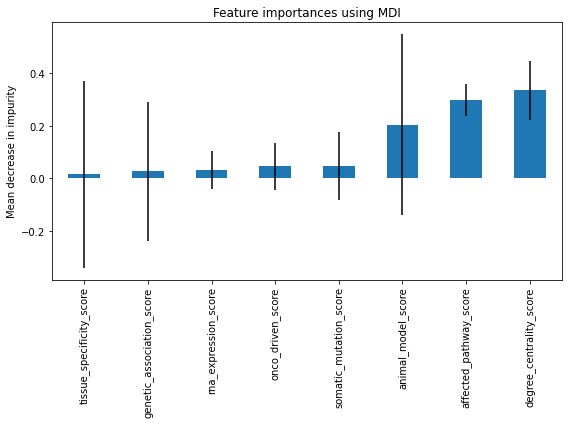

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = forest.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(importances, index=list(X_train_imb.columns))
forest_importances = forest_importances.iloc[np.argsort(forest_importances)]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

Looking at the top 4 features we can see that both efficacy and safety features equally represented.

We are surprised to see that the genetic association and somatic mutation scores are not as strong as expected.

Maybe it would be worth to go back into the association file and check if the averaging across the diseases destroyed the signal here - as it is true that for some diseases we do have the genetics driving the disease and for others we do not have it at all.

**2) Permutation Importance or Mean Decrease in Accuracy (MDA)**

is a method of computing the feature importance on permuted out-of-bag (OOB) samples based on mean decrease in the accuracy. This method is not implemented in the scikit-learn package. 

The permutation based importance can be used to overcome drawbacks of default feature importance computed with mean impurity decrease. This method will randomly shuffle each feature and compute the change in the model’s performance. The features which impact the performance the most are the most important one.

The permutation based importance is computationally expensive. The permutation based method can have problem with highly-correlated features, it can report them as unimportant.

In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, X_test_imb, y_test_imb, n_repeats=10, random_state=42, n_jobs=2)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: "
      f"{elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=list(X_train_imb.columns))
forest_importances = forest_importances.iloc[np.argsort(forest_importances)]


fig, ax = plt.subplots()
#fig.figsize=(100,18)
#plt.figure(figsize=(100,18),dpi=100)
fig.set_size_inches(8, 6)
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDA")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


Elapsed time to compute the importances: 3.993 seconds


AttributeError: ignored

puh what is going wrong here????

The good performance on the validation/testing dataset means that our model generalizes well.

On the other hand, MDAs of all exactly zero means either the model always needs just one variable to get its best performance no matter what variable that is (very unlikely because you will see below that all the methods used multiple features to decide what to predict), or that we plain simply calculated the MDAs wrong?

3) **Feature Importance computed with SHAP values** 

The SHAP interpretation can be used (it is model-agnostic) to compute the feature importances from the Random Forest. It is using the Shapley values from game theory to estimate the how does each feature contribute to the prediction.

In [ ]:
!pip install shap
# !pip3 install delayed
import shap

explainer = shap.TreeExplainer(forest)
shap_values = explainer.shap_values(X_test_imb)

distance to classify targets


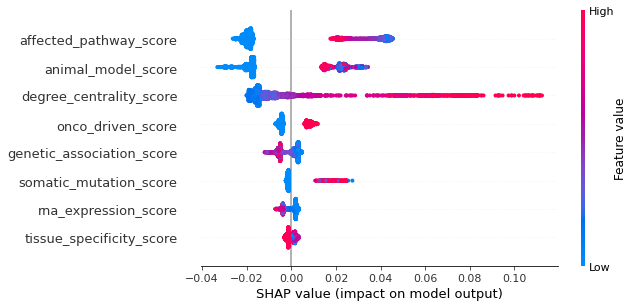

distance to classify non-targets


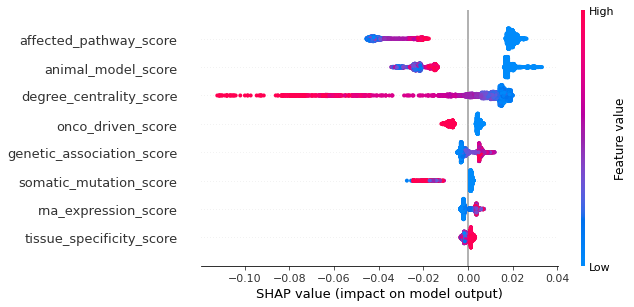

In [ ]:
print("distance to classify targets")
shap.summary_plot(shap_values[1], X_test_imb, feature_names=df_work.columns)

print("distance to classify non-targets")
shap.summary_plot(shap_values[0], X_test_imb, feature_names=df_work.columns)



These plots are so powerful as they not only show the importance contributions of each feature, they also showcase the directionality of how a feature contributed to the decision indicated by the colors.

We can see here that if there was an affected pathway associated to a gene and that gene had higher interconnectivity it was more likely to predict that it is a 'target'.

That is interesting because our hypothesis was the opposite - the more interconnection the more side effects one would have and therefore less likely to be a good target candidate - seems to be wrong as we can see clearly the enrichment of (red) high centrality scores on the target prediction side.

The same is true for the onco driven score - it seems if you have identified a onco gene it seems to be more likely to be predicted to be a target - again opposite of what we have hypothesised - maybe we should explore it further by checking backwards in what kind of diseases these onco genes were targeted to figure out the motivation/rational behind this observation (should be easy to perform -  however we are lacking the time to do so)

Also interesting to see that the tissue specificity has not a strong impact on the predictability. It's very interesting because that is actually the first thing a researcher is doing when he is assessing a new potential target - is it tissue specific or does it induce systemic adverse effects by hitting that gene - obviously that did not show any effects (would be great to have the disease pairs back in the race to get more insights on this observation - is this an overweigthed observation coming mainly from the oncology space were safety is not such a big deal due to the severe disease?)
However, one can at least appreciate that the directionality is how we would expect it. the less specific a gene is expressed in a certain organ the more predictive for a non-target.

mean distance on model output


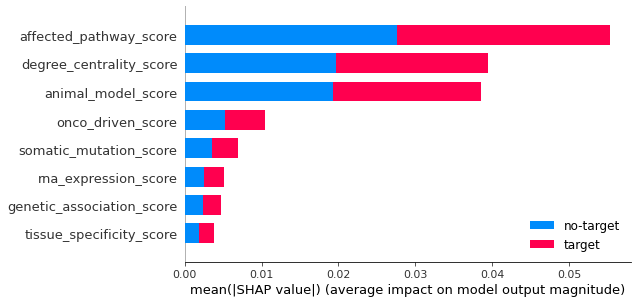

In [ ]:
print("mean distance on model output")
shap.summary_plot(shap_values, X_test_imb, plot_type="bar",feature_names=X.columns, class_names=np.unique(df_work.TARGETSTATUS) )

**LogisticRegression**

Here we look at estimated percentage unit effect (or the marginal effect) of the logistic regression model to get a sense how this classifier judged. 

Marginal effects can be used to express how the predicted probability of a binary outcome changes with a change in a risk factor. 

In [ ]:
log_reg = LogisticRegression().fit(X_train_imb.to_numpy(), y_train_imb)

In [ ]:
def issorted(arr, reverse=False):
    """
    Checks if a numpy array is sorted.
    """

    if reverse:
        return np.all(arr[::-1][:-1] <=arr[::-1][1:])

    return np.all(arr[:-1] <= arr[1:])

def get_importance(class_idx, beta, feature_names, intercepts=None):
    """
    Retrive and sort abs magnitude of coefficients from model.
    """

    # sort the absolute value of model coef from largest to smallest
    srt_beta_k = np.argsort(np.abs(beta[class_idx, :]))[::-1]
    feat_names = [feature_names[idx] for idx in srt_beta_k]
    feat_imp = beta[class_idx, srt_beta_k]

    # include bias among feat importances
    if intercepts is not None:
        intercept = intercepts[class_idx]
        bias_idx = len(feat_imp) - (np.searchsorted(np.abs(feat_imp)[::-1], np.abs(intercept)))
#         bias_idx = np.searchsorted(np.abs(feat_imp)[::-1], np.abs(intercept)) + 1
        feat_imp = np.insert(feat_imp, bias_idx, intercept.item(), )
        intercept_idx = np.where(feat_imp == intercept)[0][0]
        feat_names.insert(intercept_idx, 'bias')

    return feat_imp, feat_names

def plot_importance(feat_imp, feat_names, **kwargs):
    """
    Create a horizontal barchart of feature effects, sorted by their magnitude.
    """

    left_x, right_x = kwargs.get("left_x"), kwargs.get("right_x")
    eps_factor = kwargs.get("eps_factor", 4.5)
    xlabel = kwargs.get("xlabel", None)
    ylabel = kwargs.get("ylabel", None)
    labels_fontsize = kwargs.get("labels_fontsize", 15)
    tick_labels_fontsize = kwargs.get("tick_labels_fontsize", 15)

    # plot
    fig, ax = plt.subplots(figsize=(10, 8))
    y_pos = np.arange(len(feat_imp))
    ax.barh(y_pos, feat_imp)

    # set lables
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feat_names, fontsize=tick_labels_fontsize)
    ax.invert_yaxis()                  # labels read top-to-bottom
    ax.set_xlabel(xlabel, fontsize=labels_fontsize)
    ax.set_ylabel(ylabel, fontsize=labels_fontsize)
    ax.set_xlim(left=left_x, right=right_x)

    # add text
    for i, v in enumerate(feat_imp):
        eps = 0.03
        if v < 0:
            eps = -eps_factor*eps
        ax.text(v + eps, i + .25, str(round(v, 3)))

    return ax, fig

In [ ]:
beta = log_reg.coef_
intercepts = log_reg.intercept_
all_coefs = np.concatenate((beta, intercepts[:, None]), axis=1)

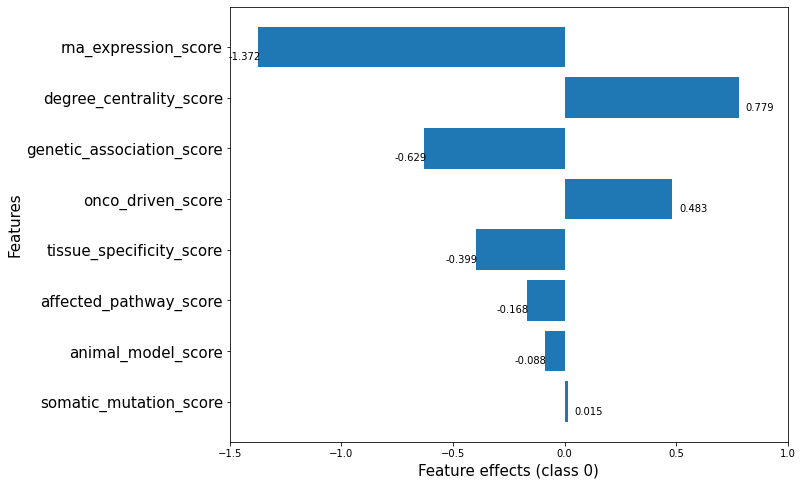

In [ ]:
class_idx = 0
feat_imp, feat_names = get_importance(class_idx,
                                      beta,
                                      df.columns[:-1],
                                      )


_, class_0_fig = plot_importance(feat_imp,
                                 feat_names,
                                 left_x=-1.5,
                                 right_x=1,
                                 
                                 xlabel = f"Feature effects (class {class_idx})",
                                 ylabel = "Features"
                                 )

Looking at this classifier it seems that the rna expression has a odds ratio of -1.348 which corresponds to an decrease of 135%.

In contrast the centrality score shows a marginal effect of 0.802 corresponding to a 80 percentage point increase

Interestingly the genetic associations as well as the tissue specificity got more importance while the affected pathways before became less important.

In [ ]:
explainer = shap.LinearExplainer(log_reg, X_train_imb, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_imb)
X_test_array = X_test_imb.to_numpy() # we need to pass a dense version for the plotting functions

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!
The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


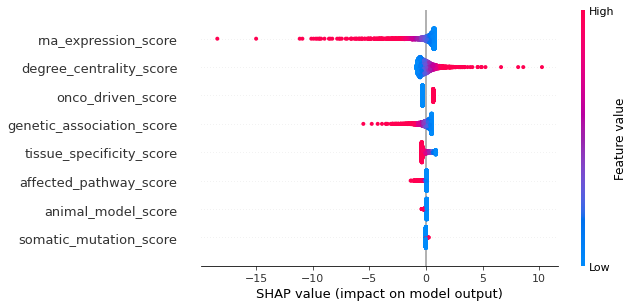

In [ ]:
shap.summary_plot(shap_values, X_test_imb, feature_names=df.columns[:-1])

Thats the same what we have observed above - but with the directionality. So, we can see for example the same phenomena that a higher interconnectivity is predicted to be a target.

**GradientBoosting**

In [ ]:
grad_reg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_train_imb, y_train_imb.replace({"no-target": 0, "target":1}))

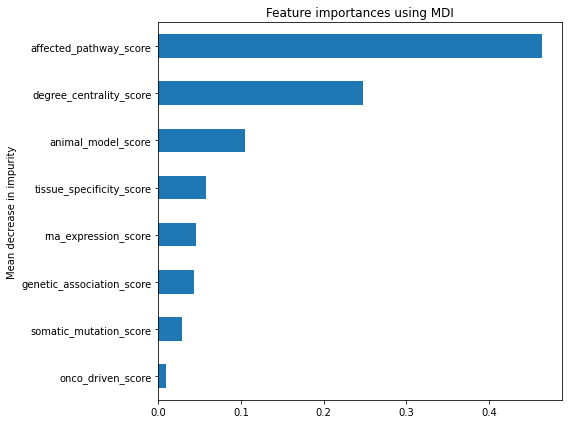

In [ ]:
import numpy as np

importances = grad_reg.feature_importances_


grad_importances = pd.Series(importances, index=list(X_train_imb.columns))
grad_importances = grad_importances.iloc[np.argsort(grad_importances)]

fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
grad_importances.plot.barh(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance
r = permutation_importance(grad_reg, X_train_imb, y_train_imb.replace({"no-target": 0, "target":1}),
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{X_train_imb.columns.tolist()[i]:<8}"
              f"{r.importances_mean[i]:.3f}"
              f" +/- {r.importances_std[i]:.3f}")

degree_centrality_score0.012 +/- 0.001
tissue_specificity_score0.010 +/- 0.001
affected_pathway_score0.008 +/- 0.001
rna_expression_score0.008 +/- 0.001
animal_model_score0.005 +/- 0.001
genetic_association_score0.005 +/- 0.001
somatic_mutation_score0.001 +/- 0.000


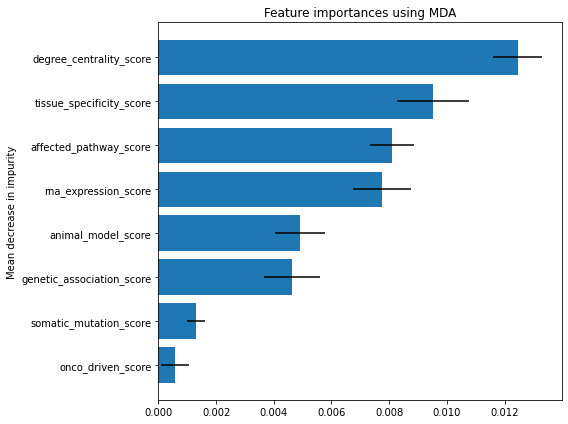

In [ ]:
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)
ind = np.argsort(r.importances_mean)
plt.barh(y=X_train_imb.columns[ind], width=r.importances_mean[ind], xerr=r.importances_std[ind])
ax.set_title("Feature importances using MDA")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

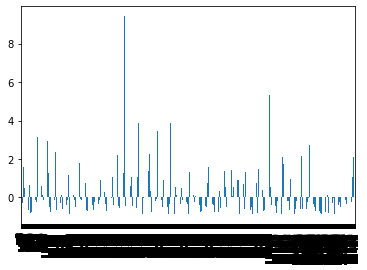

In [ ]:
X_train_imb.genetic_association_score.plot.bar()

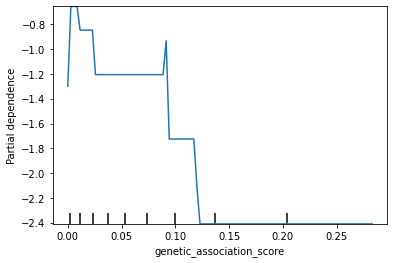

In [ ]:
plot_partial_dependence(grad_reg, X_train_imb, [2])

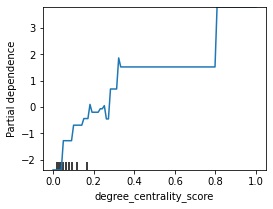

In [ ]:
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots()
fig.set_size_inches(4, 3)
features = [1, 2, 3, 5, 7,4, 6,0]
features = [5]
plot_partial_dependence(grad_reg, X_train_imb, features, ax = ax, percentiles=[0,1]) 


In [ ]:
from sklearn.inspection import plot_partial_dependence
features = [1, 2, 3, 5, 7,4, 6,0]
plot_partial_dependence(m_svc_imp, X_train_imb, features, ax = ax, percentiles=[0,1]) 

ValueError: ignored

In [ ]:
# !pip install alibi[shap]
from alibi.explainers import KernelShap
np.random.seed(0)
svm_explainer = KernelShap(m_svc_imp.decision_function)
svm_explainer.fit(X_train_imb)

svm_explanation = svm_explainer.explain(X_test_imb, l1_reg=False, summarise_background = 'auto')


shap.summary_plot(svm_explanation.shap_values[0], X_test_imb, features)

Large datasets can cause slow runtimes for shap. The background dataset provided has 13445 records. Consider passing a subset or allowing the algorithm to automatically summarize the data by setting the summarise_background=True orsetting summarise_background to 'auto' which will default to 300 samples!
Using 13445 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
Predictor returned a scalar value. Ensure the output represents a probability or decision score as opposed to a classification label!


  0%|          | 0/3362 [00:00<?, ?it/s]

In [43]:
# !pip install lime
from random import random
import lime
from lime import lime_tabular
# https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions

# ind = y_test_imb == "non-target"
# X_test_imb.iloc[np.where(ind)].sample(1).to_numpy() 

ind = y_test_imb == "target"
explainer = lime_tabular.LimeTabularExplainer(X_train_imb.to_numpy(), mode="classification", 
                                              class_names=["non-target","target"], feature_names= X_train_imb.columns.to_list())


explanation = explainer.explain_instance(X_test_imb.iloc[np.where(ind)].sample(1).to_numpy().reshape(1,-1)[0], m_svc_imp.predict_proba, num_features=len(X_test_imb.columns.to_list()))


explanation.show_in_notebook()

In [1]:
X_train_imb.describe()

NameError: ignored

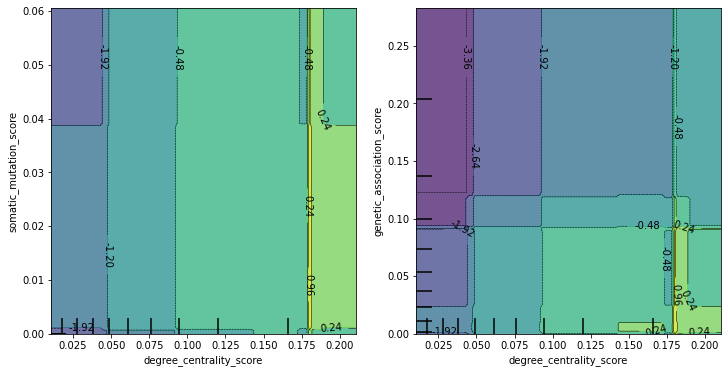

In [ ]:
features = [(5,4),(5,2)]
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)
plot_partial_dependence(grad_reg, X_train_imb, features,  n_cols=2, ax=ax) 

In [ ]:
import sklearn
# !pip sklearn
sklearn.__version__

'0.22.2.post1'

In [ ]:
# !pip install -U scikit-learn

     |████████████████████████████████| 22.3 MB 37 kB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


## Individual Conditional Expectation (ICE)
Individual Conditional Expectation (ICE) plots display one line per instance that shows how the instance's prediction changes when a feature changes.

The partial dependence plot for the average effect of a feature is a global method because it does not focus on specific instances, but on an overall average. The equivalent to a PDP for individual data instances is called individual conditional expectation (ICE) plot (Goldstein et al. 201729). An ICE plot visualizes the dependence of the prediction on a feature for each instance separately, resulting in one line per instance, compared to one line overall in partial dependence plots. A PDP is the average of the lines of an ICE plot. The values for a line (and one instance) can be computed by keeping all other features the same, creating variants of this instance by replacing the feature's value with values from a grid and making predictions with the black box model for these newly created instances. The result is a set of points for an instance with the feature value from the grid and the respective predictions.

What is the point of looking at individual expectations instead of partial dependencies? Partial dependence plots can obscure a heterogeneous relationship created by interactions. PDPs can show you what the average relationship between a feature and the prediction looks like. This only works well if the interactions between the features for which the PDP is calculated and the other features are weak. In case of interactions, the ICE plot will provide much more insight.

A more formal definition: In ICE plots, for each instance in  
{
(
x
(
i
)
S
,
x
(
i
)
C
)
}
N
i
=
1
  the curve  
^
f
(
i
)
S
  is plotted against  
x
(
i
)
S
 , while  
x
(
i
)
C
  remains fixed.

TypeError: ignored

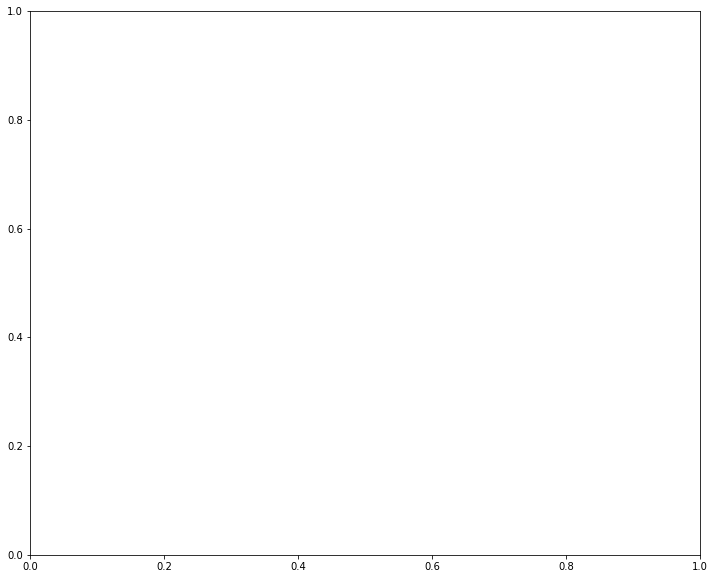

In [ ]:
# !pip install pycebox
# from pycebox.ice import ice
# ice( X_train_imb, X_train_imb.columns.tolist() , grad_reg, num_grid_points=None)
from sklearn.inspection import plot_partial_dependence
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
features = [1, 2, 3, 5, 7,4, 6,0]
plot_partial_dependence(grad_reg, X_train_imb,features, kind='individual', ax=ax) 


##Accumulated Local Effect Plot (ALEPLOT)
Accumulated local effects describe how features influence the prediction of a machine learning model on average. ALE plots are a faster and unbiased alternative to partial dependence plots (PDPs).

Both describe how a feature affects the prediction on average. 


If features of a machine learning model are correlated, the partial dependence plot cannot be trusted. The computation of a partial dependence plot for a feature that is strongly correlated with other features involves averaging predictions of artificial data instances that are unlikely in reality. This can greatly bias the estimated feature effect. Imagine calculating partial dependence plots for a machine learning model that predicts the value of a house depending on the number of rooms and the size of the living area. We are interested in the effect of the living area on the predicted value. As a reminder, the recipe for partial dependence plots is: 1) Select feature. 2) Define grid. 3) Per grid value: a) Replace feature with grid value and b) average predictions. 4) Draw curve. For the calculation of the first grid value of the PDP -- say 30 m2 -- we replace the living area for all instances by 30 m2, even for houses with 10 rooms. Sounds to me like a very unusual house. The partial dependence plot includes these unrealistic houses in the feature effect estimation and pretends that everything is fine. The following figure illustrates two correlated features and how it comes that the partial dependence plot method averages predictions of unlikely instances.

PyALE._ALE_generic:INFO: Continuous feature detected.


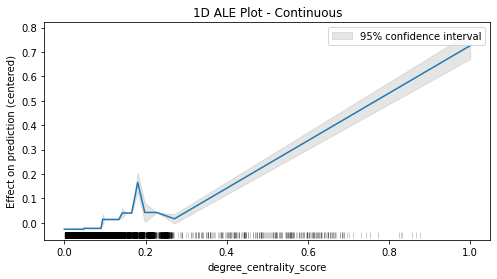

In [ ]:
# !pip install -U PyALE
from PyALE import ale

# X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X, y, test_size=0.2) 

# ale_eff = ale(
#     X=X_train_imb, model=grad_reg, feature=pd.Series(X_train_imb.columns.to_list()).T.iloc[[2,5]].tolist(), grid_size=50, include_CI=False
# )

ale_eff = ale(
    X=X_train_imb, model=grad_reg, feature=pd.Series(X_train_imb.columns.to_list()).T.iloc[[5]].tolist(), grid_size=50, include_CI=True
)

In [ ]:
(X_train_imb).describe()

affected_pathway_score  ...  onco_driven_score
count            24606.000000  ...       24606.000000
mean                 0.024045  ...           0.486548
std                  0.045001  ...           0.499829
min                  0.000000  ...           0.000000
25%                  0.000000  ...           0.000000
50%                  0.006814  ...           0.000000
75%                  0.032798  ...           1.000000
max                  0.575479  ...           1.000000

[8 rows x 8 columns]

In [ ]:
X_train_imb.describe() 

affected_pathway_score  ...  onco_driven_score
count            1.344500e+04  ...       1.344500e+04
mean             1.488459e-16  ...       8.923072e-17
std              1.000037e+00  ...       1.000037e+00
min             -4.112827e-01  ...      -7.844763e-01
25%             -4.112827e-01  ...      -7.844763e-01
50%             -4.112827e-01  ...      -7.844763e-01
75%             -3.533975e-02  ...       1.274736e+00
max              9.920516e+00  ...       1.274736e+00

[8 rows x 8 columns]

## LIME

In [ ]:
ind = y_test_imb == "target"
X_test_imb.iloc[np.where(ind)].sample(1).to_numpy() 

array([[0.02841582, 0.28907491, 0.05386476, 0.00321751, 0.        ,
        0.02537938, 0.56762494, 1.        ]])

In [ ]:
# !pip install lime
from random import random
import lime
from lime import lime_tabular
# https://coderzcolumn.com/tutorials/machine-learning/how-to-use-lime-to-understand-sklearn-models-predictions

ind = y_test_imb == "target"
X_test_imb.iloc[np.where(ind)].sample(1).to_numpy() 

ind = y_test_imb == "target"
explainer = lime_tabular.LimeTabularExplainer(X_train_imb.to_numpy(), mode="classification", 
                                              class_names=["non-target","target"], feature_names= X_train_imb.columns.to_list())


explanation = explainer.explain_instance(X_test_imb.iloc[np.where(ind)].sample(1).to_numpy().reshape(1,-1)[0], grad_reg.predict_proba, num_features=len(X_test_imb.columns.to_list()))


explanation.show_in_notebook()

In [ ]:
with plt.style.context("ggplot"):
    fig = plt.figure(figsize=(8,6))
    plt.barh(range(len(lr.coef_[0])), lr.coef_[0], color=["red" if coef<0 else "green" for coef in lr.coef_[0]])
    plt.yticks(range(len(lr.coef_[0])), breast_cancer.feature_names);
    plt.title("Weights")

NameError: ignored

<Figure size 576x432 with 0 Axes>

AttributeError: ignored

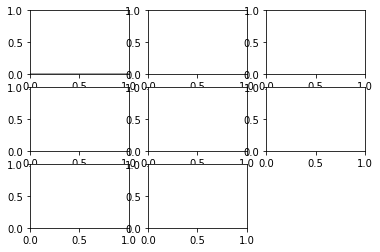

In [ ]:
dir(gbm_ale_explainer)

plot_ale(gbm_ale)

Similarly as for the random forest the gradient boosting classifier has also an internal feature importance measure that determines the MDI to judge on the importance.

We can see that no matter on which classifier we have looked at it was always the centrality score that was one of the best predictor.

In [ ]:
explainer = shap.TreeExplainer(grad_reg, X_train_imb)
shap_values = explainer.shap_values(X_test_imb)
X_test_array = X_test_imb.to_numpy() # we need to pass a dense version for the plotting functions

In [ ]:
shap.summary_plot(shap_values, X_test_imb, feature_names=df.columns[:-1])

NameError: ignored

the best performing classifier is shown last but not least.

We can see that this time the centrality scores are the most important features where a high interconnectivity of a gene is highly predictive for a target.

This time the tissue specificity is more important as it is in the other models. Is this the reason for the better performance? This is at least a feature that most researchers are using as a rough first estimate if a potential target might be interesting or not (proxy for do we expect systemic adverse effects by hitting that gene?) So happy to see that feature on the upper side if the feature importance list.  Also, the genetic associations are bit higher ranked.

Also, a great sign for the research community is that the RNA expressions are not so unimportant to investigate a target. This is currently the most common method that is used to look broadly in an experimental setting because it is practically  convenient and cheap. These features is debated a lot if it is too far away to judge on target-disease potential and it seems that its valuable or is our dataset biased because everybody is running RNAseq and therefore the chance to see evidences between target and RNA expression is increased?


## 2.3) Predicting dataset

(16807, 9)


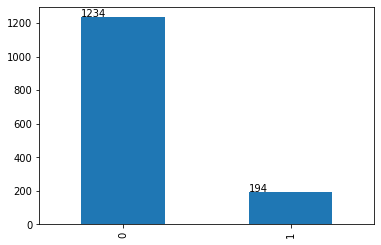

In [ ]:
df_work = df[df.TARGETSTATUS != "unknown-target"].copy()
print(df_work.shape)

X = df_work.drop(columns="TARGETSTATUS").copy()
y = df_work.TARGETSTATUS.copy()

X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(X, y, test_size=0.2)

sc = StandardScaler()

# Standardizing the features
X_train_imb =sc.fit_transform(X_train_imb)
X_test_imb = sc.transform(X_test_imb)

if "TARGETSTATUS" in df_pred.columns:
  df_pred.drop(columns="TARGETSTATUS", inplace=True)

unk = sc.transform(df_pred)
# unk = df_pred
y = df_pred.index
pred_proba_unknown = pd.Series(grad_reg.predict_proba(unk)[:,1], index=y)
pred_unknown = pd.Series(grad_reg.predict(unk), index=y)

ax = pred_unknown.value_counts().plot.bar()

for p in ax.patches:
  ax.annotate(str(round(p.get_height(),2)), (p.get_x() * 1.005, p.get_height() * 1.005))

**Success rate**

In [ ]:
pred_unknown.value_counts() / len(df_pred)

0    0.864146
1    0.135854
dtype: float64

In [ ]:
pd.read_table("Raw_Assets/P2-01-TTD_uniprot_all.txt", skiprows=21).unstack()

-------------------------------------------------------------------------------------------------------  ...             
                                                                                                      TARGETID  ...     UNIPROID
T00032                                             T00032                                                       ...   OSTP_HUMAN
T00033                                             T00033                                                       ...   TGFA_HUMAN
T00037                                             T00037                                                       ...   ERG6_PNEC8
T00039                                             T00039                                                       ...   CTGF_HUMAN
T00075                                             T00075                                                       ...  MRCKA_HUMAN
...                                                   ...                                                       ...          ...
T99912                                             T99912                                                       ...   KYNU_HUMAN
T99948                                             T99948                                                       ...  PD1L1_HUMAN
T99954                                             T99954                                                       ...   PI2R_HUMAN
T99989                                             T99989                                                       ...   KC1E_HUMAN
T99990                                             T99990                                                       ...    BMX_HUMAN

[3473 rows x 4 columns]

if one calculates the proportion of potential gene targets that would make it eventually on the market based on our predictions we see a success rate of 13.4%. 

That is incredibly close to the recent observations of [Wo et al 2019](https://pubmed.ncbi.nlm.nih.gov/29394327/) who found a success rate overall diseases by around 13.8%. So, this number seems to be realisticly represented by our classifier. 

Our classifier suggests the following genes as potential new targets that may end up on the market.

In [ ]:
pred_proba_unknown.sort_values(ascending=True).head(10)

SYMBOL
DYNAP      0.000530
GSTA2      0.000878
SBK3       0.000931
RXYLT1     0.001101
TRPC7      0.001292
SCGB1D2    0.001368
PREPL      0.001487
PHLDB3     0.001538
CHST5      0.001548
ANKH       0.001727
dtype: float64

In [ ]:
!cd Raw_Assets/ && wget http://db.idrblab.net/ttd/sites/default/files/ttd_database/P1-01-TTD_target_download.txt

--2021-05-27 10:47:36--  http://db.idrblab.net/ttd/sites/default/files/ttd_database/P1-01-TTD_target_download.txt
Resolving db.idrblab.net (db.idrblab.net)... 47.88.56.212
Connecting to db.idrblab.net (db.idrblab.net)|47.88.56.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9945764 (9.5M) [text/plain]
Saving to: ‘P1-01-TTD_target_download.txt’

P1-01-TTD_target_do 100%[===================>]   9.48M  12.0MB/s    in 0.8s    

2021-05-27 10:47:37 (12.0 MB/s) - ‘P1-01-TTD_target_download.txt’ saved [9945764/9945764]



In [ ]:
pd.read_table("Raw_Assets/P1-01-TTD_target_download.txt", skiprows=40).head()

ParserError: ignored

In [ ]:
raw = pd.read_table("Raw_Assets/P2-01-TTD_uniprot_all.txt", skiprows=21).unstack().T.reset_index(level=[0], drop=True).T


TARGETID  ...     UNIPROID
T00032   T00032  ...   OSTP_HUMAN
T00033   T00033  ...   TGFA_HUMAN
T00037   T00037  ...   ERG6_PNEC8
T00039   T00039  ...   CTGF_HUMAN
T00075   T00075  ...  MRCKA_HUMAN

[5 rows x 4 columns]

In [ ]:
[i for i in raw.UNIPROID if i == target[3]]

[]

In [ ]:
target = list(set(pred_proba_unknown[pred_proba_unknown > 0.5].index.to_list()))

d = {}
overview = []

for t in target:
  l = []
  for (m,id) in zip(raw.UNIPROID.str.upper(), raw.TARGETID):
    if t in m:
      l.append(id)

  l = list(set(l))
  d[t] = l
  overview += l
  
not_found = [k for k,v in d.items() if v == [] ]


for f in not_found:
  l = []
  for m, id in zip(raw.TARGNAME.str.upper(), raw.TARGETID):
    if f in m:
      l.append(id)

  
  l = list(set(l))
  d[f] = l  
  overview += l




In [ ]:
print("before", len(overview), "after", len(set(overview)))

before 314 after 305


In [ ]:
mapping.columns

Index(['TargetID', 'Target_Name', 'DrugID', 'Drug_Name', 'Highest_status',
       'MOA', 'Activity', 'Referecnce'],
      dtype='object')

In [ ]:
mapping.drop_duplicates("TargetID").set_index("TargetID").reindex(index=list(set(overview))).dropna()

Target_Name  ...                                         Referecnce
TargetID                                                     ...                                                   
T56871               Lysine-specific demethylase 5B (KDM5B)  ...        http://www.ncbi.nlm.nih.gov/pubmed/23408432
T54156                   Matrix metalloproteinase-9 (MMP-9)  ...  http://phrma-docs.phrma.org/files/dmfile/MID_I...
T03046                                 Mutated KRAS (mKRAS)  ...        https://www.globeimmune.com/cancer/gi-4000/
T79160    Glial cell line-derived neurotrophic factor (G...  ...       https://www.ncbi.nlm.nih.gov/pubmed/15950434
T10670               Neuropeptide Y receptor type 2 (NPY2R)  ...  http://www.guidetopharmacology.org/GRAC/Object...
...                                                     ...  ...                                                ...
T91149                       AKT3 messenger RNA (AKT3 mRNA)  ...        http://www.ncbi.nlm.nih.gov/pubmed/18800763
T20669                   PRKACA messenger RNA (PRKACA mRNA)  ...    http://www.freepatentsonline.com/US8846696.html
T03644                               Synuclein alpha (SNCA)  ...  http://phrma-docs.phrma.org/files/dmfile/MID_N...
T49925                    Tyrosine-protein kinase Fgr (FGR)  ...        http://www.ncbi.nlm.nih.gov/pubmed/15546730
T56051                    Ubiquitin thioesterase L1 (UCHL1)  ...        http://www.ncbi.nlm.nih.gov/pubmed/17449248

[168 rows x 7 columns]

In [ ]:
 mapping.Target_Name.str.upper()

0        HEPATITIS B VIRUS REVERSE TRANSCRIPTASE (HBV RT)
1                       POTASSIUM CHANNEL UNSPECIFIC (KC)
2                                 5-HT 1 RECEPTOR (5HT1R)
3                              DOPAMINE D1 RECEPTOR (D1R)
4                                 5-HT 3 RECEPTOR (5HT3R)
                               ...                       
43869                        CANNABINOID RECEPTOR 1 (CB1)
43870                          DOPAMINE D2 RECEPTOR (D2R)
43871                         HISTAMINE H1 RECEPTOR (H1R)
43872                         COAGULATION FACTOR IIA (F2)
43873                    PROSTAGLANDIN G/H SYNTHASE (COX)
Name: Target_Name, Length: 43874, dtype: object

# 2.4 Estimate Which company have the most predicted targets in their preclinical stage - suggesting to buy shares of these companies

Download the Target-Drug Mapping file from TTD

In [ ]:
!cd Raw_Assets/ && pwd && wget http://db.idrblab.net/ttd/sites/default/files/ttd_database/P1-07-Drug-TargetMapping.xlsx

/content/drive/Shareddrives/MADS_Milestone1/Raw_Assets
--2021-05-27 05:35:28--  http://db.idrblab.net/ttd/sites/default/files/ttd_database/P1-07-Drug-TargetMapping.xlsx
Resolving db.idrblab.net (db.idrblab.net)... 47.88.56.212
Connecting to db.idrblab.net (db.idrblab.net)|47.88.56.212|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2549998 (2.4M)
Saving to: ‘P1-07-Drug-TargetMapping.xlsx’

P1-07-Drug-TargetMa 100%[===================>]   2.43M  3.76MB/s    in 0.6s    

2021-05-27 05:35:31 (3.76 MB/s) - ‘P1-07-Drug-TargetMapping.xlsx’ saved [2549998/2549998]



Perform WebScrapping to get informations about Mode of Action, disease field of target and which company is in the lead with first class potential

In [ ]:
mapping = pd.read_excel("Raw_Assets/P1-07-Drug-TargetMapping.xlsx")
mapping.head()

TargetID  ...                                       Referecnce
0   T56518  ...        http://aac.asm.org/content/50/9/2926.full
1   T67952  ...  http://adisinsight.springer.com/drugs/800000214
2   T67054  ...  http://adisinsight.springer.com/drugs/800001389
3   T22118  ...  http://adisinsight.springer.com/drugs/800001476
4   T84160  ...  http://adisinsight.springer.com/drugs/800001830

[5 rows x 8 columns]

In [ ]:
MAP = mapping[mapping.Highest_status =="Preclinical"].copy()
[i for i in MAP.Referecnce if "adisinsight" not in i]

['http://anavex.com/pipeline.html',
 'http://anavex.com/pipeline.html',
 'http://anavex.com/pipeline.html',
 'http://bionovo.com/investors/pr/MjAxMTEyMDgwODAw',
 'http://business.highbeam.com/436989/article-1G1-146237368/viral-infection-therapy-mnlpharma-mnlpharma-partnering',
 'http://cancerres.aacrjournals.org/content/70/8_Supplement/2617.short',
 'http://meeting.ascopubs.org/cgi/content/short/23/16_suppl/3205',
 'http://news.bms.com/press-release/rd-news/bristol-myers-squibb-announces-collaboration-evaluate-opdivo-nivolumab-combina',
 'http://news.bms.com/press-release/rd-news/bristol-myers-squibb-announces-collaboration-evaluate-opdivo-nivolumab-combina',
 'http://worldwide.espacenet.com/publicationDetails/biblio?DB=worldwide.espacenet.com&II=0&ND=3&adjacent=true&locale=en_EP&FT=D&date=20081030&CC=US&NR=2008269123A1&KC=A1',
 'http://worldwide.espacenet.com/publicationDetails/biblio?DB=worldwide.espacenet.com&II=0&ND=3&adjacent=true&locale=en_EP&FT=D&date=20090205&CC=WO&NR=200901648

In [ ]:
from bs4 import BeautifulSoup

URL = 'https://adisinsight.springer.com/drugs/800019225'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'html.parser')

In [ ]:
scraped = [v.get_text().strip() for v in soup.find_all("span", {"class": "data-list__property-value"})]



['BioStratum',
 'Monoclonal antibodies',
 'Undefined mechanism',
 'No',
 'Cancer metastases',
 'No recent reports of development identified for preclinical development in Cancer-metastases in USA',
 'Laminin-5 monoclonal antibodies have been licensed to Novo Nordisk worldwide for the treatment of cancer',
 'Preclinical trials in Cancer metastases in USA (unspecified route)']

In [ ]:
URL = 'https://pubmed.ncbi.nlm.nih.gov/18782669/'
page = requests.get(URL)

soup = BeautifulSoup(page.content, 'lxml')

In [ ]:
scraped = [v.get_text().strip() for v in soup.find_all("span", {"class": "authors-list-item"})]

scraped

['Gwennaël Ledour\xa0\n                1\n              ,',
 'Gautier Moroy,',
 'Matthieu Rouffet,',
 'Erika Bourguet,',
 'Dominique Guillaume,',
 'Martine Decarme,',
 'Haquima Elmourabit,',
 'Franck Augé,',
 'Alain J P Alix,',
 'Jean-Yves Laronze,',
 'Georges Bellon,',
 'William Hornebeck,',
 'Janos Sapi',
 'Gwennaël Ledour\xa0et al.',
 'Gwennaël Ledour\xa0\n                1\n              ,',
 'Gautier Moroy,',
 'Matthieu Rouffet,',
 'Erika Bourguet,',
 'Dominique Guillaume,',
 'Martine Decarme,',
 'Haquima Elmourabit,',
 'Franck Augé,',
 'Alain J P Alix,',
 'Jean-Yves Laronze,',
 'Georges Bellon,',
 'William Hornebeck,',
 'Janos Sapi']

In [ ]:
scraped = soup.find_all("sup", {"class": "affiliation-links"})
scraped[0].find("a").get("title")
# [re.findall("title", i) for i in scraped)]

'Université de Reims-Champagne-Ardenne, CNRS UMR 6229, Institut de Chimie Moléculaire de Reims, Faculté de Pharmacie, IFR53 Biomolécules, 51 rue de Cognacq-Jay, 51096 Reims Cedex, France.'

In [ ]:
soup.find_all("title")

[<title>Pyridylthiazole-based ureas as inhibitors of Rho associated protein kinases (ROCK1 and 2) - PubMed</title>,
 <title>Twitter</title>,
 <title>Facebook</title>,
 <title>Youtube</title>,
 <title>LinkedIn</title>,
 <title>GitHub</title>,
 <title>SM-Facebook</title>,
 <title>SM-Twitter</title>,
 <title>SM-Youtube</title>]

In [ ]:
# from sklearn import tree
# import graphviz

# # Creates dot file named tree.dot
# # tree.export_graphviz(
# #             TreeClass,
# #             out_file =  "Visualizations/DecisionTreeClassifier_upsampled.dot",
# #             feature_names = list(X_test_up.columns),
# #             class_names = y_train_up,
# #             filled = True,
# #             rounded = True)

# #graph = graphviz.Source("Visualizations/DecisionTreeClassifier_upsampled.dot") 
# #graph.render() 

# plt.figure(figsize=(20,10))
# TreeClass = DecisionTreeClassifier().fit(X_train_up,y_train_up)

# graph = tree.plot_tree(TreeClass, max_depth=2, feature_names = list(X.columns), 
#                        class_names = y_train_up)
